In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Попробуем загрузить все строки, включая строки со странной длинной

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dataset1.csv', sep=',', low_memory=False)
df.shape

(1209, 1754)

In [5]:
df.head(3)

,ID,A01_0_1,A01_0_2,A01_0_3,A01_0_4,A01_0_5,A01_0_6,A01_0_7,A01_0_8,A01_0_9,A01_0_10,A01_0_11,A01_0_12,A01_0_13,A01_0_14,A01_0_15,A01_0_998,A01_0_997,A01_0_998T,A01_1,A01_2,A02,A04_1,A04_2,A05_1_1,A05_2_1,A05_3_1,A05_4_1,A05_5_1,A05_6_1,A05_7_1,A05_8_1,A05_9_1,A05_998_1,A05_999_1,A05_1_2,A05_2_2,A05_3_2,A05_4_2,A05_5_2,A05_6_2,A05_7_2,A05_8_2,A05_9_2,A05_998_2,A05_999_2,A05_1_3,A05_2_3,A05_3_3,A05_4_3,A05_5_3,A05_6_3,A05_7_3,A05_8_3,A05_9_3,A05_998_3,A05_999_3,A05_1_4,A05_2_4,A05_3_4,A05_4_4,A05_5_4,A05_6_4,A05_7_4,A05_8_4,A05_9_4,A05_998_4,A05_999_4,A05_1_5,A05_2_5,A05_3_5,A05_4_5,A05_5_5,A05_6_5,A05_7_5,A05_8_5,A05_9_5,A05_998_5,A05_999_5,A05_1_6,A05_2_6,A05_3_6,A05_4_6,A05_5_6,A05_6_6,A05_7_6,A05_8_6,A05_9_6,A05_998_6,A05_999_6,A05_1_8,A05_2_8,A05_3_8,A05_4_8,A05_5_8,A05_6_8,A05_7_8,A05_8_8,A05_9_8,A05_998_8,A05_999_8,A05_1_9,A05_2_9,A05_3_9,A05_4_9,A05_5_9,A05_6_9,A05_7_9,A05_8_9,A05_9_9,A05_998_9,A05_999_9,A05_1_10,A05_2_10,A05_3_10,A05_4_10,A05_5_10,A05_6_10,A05_7_10,A05_8_10,A05_9_10,A05_998_10,A05_999_10,A05_1_11,A05_2_11,A05_3_11,A05_4_11,A05_5_11,A05_6_11,A05_7_11,A05_8_11,A05_9_11,A05_998_11,A05_999_11,A05_1_12,A05_2_12,A05_3_12,A05_4_12,A05_5_12,A05_6_12,A05_7_12,A05_8_12,A05_9_12,A05_998_12,A05_999_12,A05_1_13,A05_2_13,A05_3_13,A05_4_13,A05_5_13,A05_6_13,A05_7_13,A05_8_13,A05_9_13,A05_998_13,A05_999_13,A05_1_14,A05_2_14,A05_3_14,A05_4_14,A05_5_14,A05_6_14,A05_7_14,A05_8_14,A05_9_14,A05_998_14,A05_999_14,A05_1_15,A05_2_15,A05_3_15,A05_4_15,A05_5_15,A05_6_15,A05_7_15,A05_8_15,A05_9_15,A05_998_15,A05_999_15,A05_1_998,A05_2_998,A05_3_998,A05_4_998,A05_5_998,A05_6_998,A05_7_998,A05_8_998,A05_9_998,A05_998_998,A05_999_998,A05_998_1T,A05_998_2T,A05_998_3T,A05_998_4T,A05_998_5T,A05_998_6T,A05_998_8T,A05_998_9T,A05_998_10T,A05_998_11T,A05_998_12T,A05_998_13T,A05_998_14T,A05_998_15T,A05_998_998T,A06_1_1,A06_2_1,A06_3_1,A06_4_1,A06_5_1,A06_6_1,A06_7_1,A06_8_1,A06_9_1,A06_998_1,A06_997_1,A06_1_2,A06_2_2,A06_3_2,A06_4_2,A06_5_2,A06_6_2,A06_7_2,A06_8_2,A06_9_2,A06_998_2,A06_997_2,A06_1_3,A06_2_3,A06_3_3,A06_4_3,A06_5_3,A06_6_3,A06_7_3,A06_8_3,A06_9_3,A06_998_3,A06_997_3,A06_1_4,A06_2_4,A06_3_4,A06_4_4,A06_5_4,A06_6_4,A06_7_4,A06_8_4,A06_9_4,A06_998_4,A06_997_4,A06_1_5,A06_2_5,A06_3_5,A06_4_5,A06_5_5,A06_6_5,A06_7_5,A06_8_5,A06_9_5,A06_998_5,A06_997_5,A06_1_6,A06_2_6,A06_3_6,A06_4_6,A06_5_6,A06_6_6,A06_7_6,A06_8_6,A06_9_6,A06_998_6,A06_997_6,A06_1_8,A06_2_8,A06_3_8,A06_4_8,A06_5_8,A06_6_8,A06_7_8,A06_8_8,A06_9_8,A06_998_8,A06_997_8,A06_1_9,A06_2_9,A06_3_9,A06_4_9,A06_5_9,A06_6_9,A06_7_9,A06_8_9,A06_9_9,A06_998_9,A06_997_9,A06_1_10,A06_2_10,A06_3_10,A06_4_10,A06_5_10,A06_6_10,A06_7_10,A06_8_10,A06_9_10,A06_998_10,A06_997_10,A06_1_11,A06_2_11,A06_3_11,A06_4_11,A06_5_11,A06_6_11,A06_7_11,A06_8_11,A06_9_11,A06_998_11,A06_997_11,A06_1_12,A06_2_12,A06_3_12,A06_4_12,A06_5_12,A06_6_12,A06_7_12,A06_8_12,A06_9_12,A06_998_12,A06_997_12,A06_1_13,A06_2_13,A06_3_13,A06_4_13,A06_5_13,A06_6_13,A06_7_13,A06_8_13,A06_9_13,A06_998_13,A06_997_13,A06_1_14,A06_2_14,A06_3_14,A06_4_14,A06_5_14,A06_6_14,A06_7_14,A06_8_14,A06_9_14,A06_998_14,A06_997_14,A06_1_15,A06_2_15,A06_3_15,A06_4_15,A06_5_15,A06_6_15,A06_7_15,A06_8_15,A06_9_15,A06_998_15,A06_997_15,A06_1_998,A06_2_998,A06_3_998,A06_4_998,A06_5_998,A06_6_998,A06_7_998,A06_8_998,A06_9_998,A06_998_998,A06_997_998,A06_998_1T,A06_998_2T,A06_998_3T,A06_998_4T,A06_998_5T,A06_998_6T,A06_998_8T,A06_998_9T,A06_998_10T,A06_998_11T,A06_998_12T,A06_998_13T,A06_998_14T,A06_998_15T,A06_998_998T,A07,A08__1,A08__2,A08__3,A08__4,A08__5,A08__6,A08__7,A08__8,A08__9,A08__10,A08__11,A08__12,A08__13,A08__14,A08__15,A08__16,A08__17,A08__18,A08__19,A08__998,A08__998T,B01,Q17_98T,Q17_99T,Q17_100T,B01_1,B02,B03,B04,B05,B06_1_1,B06_2_1,B06_1_2,B06_2_2,B06_1_3,B06_2_3,B06_1_4,B06_2_4,B06_1_5,B06_2_5,B06_1_6,B06_2_6,B06_1_7,B06_2_7,B06_1_8,B06_2_8,B06_1_9,B06_2_9,B06_1_10,B06_2_10,B06_1_11,B06_2_11,B06_1_12,B06_2_12,B06_1_13,B06_2_13,B06_1_14,B06_2_14,B06_1_15,B06_2_15,B06_1_16,B06_2_16,B06_1_17,B06_2_17,B06_1_998,B06_2_998,B06_

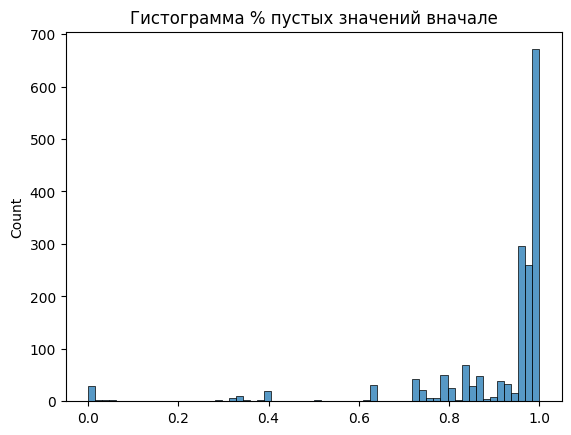

In [6]:
sns.histplot(df.isna().mean())
plt.title('Гистограмма % пустых значений вначале');

Сразу избавимся от пустых столбцов

In [7]:
for col in df.columns:
  if df[col].nunique() < 2:
    df = df.drop(columns=col)
df.shape

(1209, 1315)

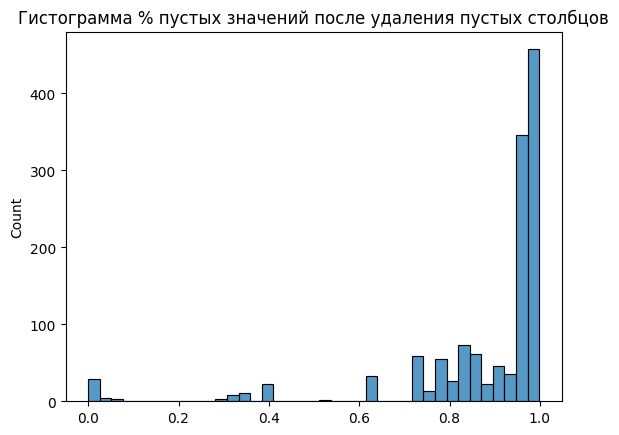

In [8]:
sns.histplot(df.isna().mean())
plt.title('Гистограмма % пустых значений после удаления пустых столбцов');

In [9]:
n = 0
for col in df.columns:
  if 'T' not in df[col] and df[col].dtype == 'object':
    n += 1
print('Кол-во чисовых столбцов, затронутых ошибками из-за аномального сдвига в данных:', n)

Кол-во чисовых столбцов, затронутых ошибками из-за аномального сдвига в данных: 183


Последовательно проанализируем признаки (вопросы анкеты)

In [10]:
print('Кол-во дубликатов ID:', df.ID.duplicated().sum(), '. Кол-во NA ID:', df.ID.isna().sum())

Кол-во дубликатов ID: 4 . Кол-во NA ID: 0


In [11]:
# Дублирующиеся ID.
"""
ЧТО-ТО НАДО УДАЛИТЬ НАВЕРНОЕ ТУТ
"""
dubbs = list(map(int, df[df.ID.duplicated()].ID.dropna())) # список индексов строк с дублирующимися ID
for d in dubbs:
    display(df[df.ID == d])

,ID,A01_0_1,A01_0_2,A01_0_3,A01_0_4,A01_0_5,A01_0_6,A01_0_7,A01_0_8,A01_0_9,A01_0_10,A01_0_11,A01_0_12,A01_0_13,A01_0_14,A01_0_15,A01_0_998,A01_0_998T,A01_1,A01_2,A02,A04_1,A04_2,A05_1_1,A05_2_1,A05_3_1,A05_4_1,A05_5_1,A05_6_1,A05_7_1,A05_8_1,A05_9_1,A05_998_1,A05_999_1,A05_1_2,A05_2_2,A05_3_2,A05_4_2,A05_5_2,A05_6_2,A05_7_2,A05_8_2,A05_9_2,A05_998_2,A05_999_2,A05_1_3,A05_2_3,A05_3_3,A05_4_3,A05_5_3,A05_6_3,A05_7_3,A05_8_3,A05_9_3,A05_998_3,A05_999_3,A05_1_4,A05_2_4,A05_3_4,A05_4_4,A05_5_4,A05_6_4,A05_7_4,A05_8_4,A05_9_4,A05_998_4,A05_999_4,A05_1_5,A05_2_5,A05_3_5,A05_4_5,A05_5_5,A05_6_5,A05_7_5,A05_8_5,A05_9_5,A05_998_5,A05_999_5,A05_1_6,A05_2_6,A05_3_6,A05_4_6,A05_5_6,A05_6_6,A05_7_6,A05_8_6,A05_9_6,A05_998_6,A05_1_8,A05_2_8,A05_3_8,A05_4_8,A05_5_8,A05_6_8,A05_7_8,A05_8_8,A05_9_8,A05_998_8,A05_999_8,A05_1_9,A05_2_9,A05_3_9,A05_6_9,A05_8_9,A05_1_10,A05_2_10,A05_3_10,A05_4_10,A05_5_10,A05_6_10,A05_7_10,A05_8_10,A05_9_10,A05_998_10,A05_999_10,A05_1_11,A05_2_11,A05_3_11,A05_4_11,A05_5_11,A05_6_11,A05_7_11,A05_8_11,A05_9_11,A05_998_11,A05_999_11,A05_1_12,A05_2_12,A05_3_12,A05_4_12,A05_5_12,A05_6_12,A05_7_12,A05_8_12,A05_9_12,A05_999_12,A05_1_13,A05_2_13,A05_3_13,A05_4_13,A05_5_13,A05_6_13,A05_7_13,A05_8_13,A05_9_13,A05_998_13,A05_999_13,A05_1_14,A05_3_14,A05_5_14,A05_7_14,A05_8_14,A05_9_14,A05_1_15,A05_2_15,A05_4_15,A05_5_15,A05_7_15,A05_8_15,A05_9_15,A05_998_1T,A05_998_2T,A05_998_3T,A05_998_4T,A05_998_5T,A05_998_6T,A05_998_8T,A05_998_10T,A05_998_11T,A05_998_12T,A05_998_13T,A05_998_15T,A06_1_1,A06_2_1,A06_3_1,A06_4_1,A06_5_1,A06_6_1,A06_7_1,A06_8_1,A06_9_1,A06_998_1,A06_997_1,A06_1_2,A06_2_2,A06_3_2,A06_4_2,A06_6_2,A06_7_2,A06_8_2,A06_9_2,A06_998_2,A06_997_2,A06_1_3,A06_2_3,A06_3_3,A06_4_3,A06_5_3,A06_6_3,A06_7_3,A06_8_3,A06_9_3,A06_998_3,A06_997_3,A06_1_4,A06_2_4,A06_3_4,A06_4_4,A06_5_4,A06_6_4,A06_998_4,A06_997_4,A06_1_5,A06_2_5,A06_3_5,A06_4_5,A06_5_5,A06_6_5,A06_9_5,A06_998_5,A06_997_5,A06_1_6,A06_2_6,A06_3_6,A06_4_6,A06_5_6,A06_6_6,A06_7_6,A06_9_6,A06_998_6,A06_997_6,A06_1_8,A06_2_8,A06_3_8,A06_4_8,A06_5_8,A06_6_8,A06_7_8,A06_8_8,A06_9_8,A06_998_8,A06_997_8,A06_4_9,A06_6_9,A06_1_10,A06_2_10,A06_3_10,A06_4_10,A06_5_10,A06_6_10,A06_7_10,A06_9_10,A06_998_10,A06_997_10,A06_1_11,A06_2_11,A06_3_11,A06_4_11,A06_5_11,A06_6_11,A06_7_11,A06_8_11,A06_9_11,A06_998_11,A06_997_11,A06_1_12,A06_2_12,A06_3_12,A06_4_12,A06_5_12,A06_6_12,A06_7_12,A06_8_12,A06_9_12,A06_998_12,A06_997_12,A06_1_13,A06_2_13,A06_3_13,A06_4_13,A06_5_13,A06_6_13,A06_7_13,A06_8_13,A06_998_13,A06_997_13,A06_1_14,A06_2_14,A06_3_14,A06_4_14,A06_6_14,A06_998_14,A06_997_14,A06_2_15,A06_4_15,A06_6_15,A06_7_15,A06_998_1T,A06_998_2T,A06_998_3T,A06_998_4T,A06_998_5T,A06_998_6T,A06_998_8T,A06_998_10T,A06_998_11T,A06_998_12T,A06_998_13T,A07,A08__1,A08__2,A08__3,A08__4,A08__5,A08__6,A08__7,A08__8,A08__9,A08__10,A08__11,A08__12,A08__13,A08__14,A08__15,A08__16,A08__998,A08__998T,B01,Q17_98T,Q17_99T,Q17_100T,B01_1,B02,B03,B04,B05,B06_1_1,B06_2_1,B06_1_2,B06_2_2,B06_1_3,B06_2_3,B06_1_4,B06_2_4,B06_1_5,B06_2_5,B06_1_6,B06_2_6,B06_1_7,B06_2_7,B06_1_8,B06_2_8,B06_1_9,B06_2_9,B06_1_10,B06_2_10,B06_1_11,B06_2_11,B06_1_12,B06_2_12,B06_1_13,B06_2_13,B06_1_14,B06_2_14,B06_1_15,B06_2_15,B06_1_16,B06_2_16,B06_1_17,B06_2_17,B06_1_998,B06_2_998,B06__998T,B08_1,B08_2,B08_3,B08_4,B08_5,B09_0_1,B09_0_2,B09_0_3,B09_0_4,B09_0_5,B09_0_6,B09_0_7,B09_0_998,B09_0_998T,B09_1,B12,Q68_99T,B10_1_1,B10_2_1,B10_3_1,B10_4_1,B10_5_1,B10_6_1,B10_7_1,B10_8_1,B10_9_1,B10_10_1,B10_11_1,B10_12_1,B10_13_1,B10_14_1,B10_15_1,B10_997_1,B10_998_1,B10_1_2,B10_2_2,B10_3_2,B10_4_2,B10_5_2,B10_6_2,B10_7_2,B10_9_2,B10_10_2,B10_11_2,B10_12_2,B10_13_2,B10_14_2,B10_15_2,B10_997_2,B10_1_3,B10_2_3,B10_3_3,B10_4_3,B10_5_3,B10_6_3,B10_7_3,B10_8_3,B10_9_3,B10_10_3,B10_11_3,B10_12_3,B10_13_3,B10_14_3,B10_15_3,B10_997_3,B10_998_3,B10_1_4,B10_2_4,B10_3_4,B10_4_4,B10_5_4,B10_6_4,B10_7_4,B10_8_4,B10_9_4,B10_10_4,B10_11_4,B10_12_4,B10_13_4,B10_14_4,B10_15_4,B10_997_4,B10_998_4,B10_1_5,B10_2_5,B10_3_5,B10_4_5,B10_6_5,B10_7_5,B10_8_5,B10_9_5,

,ID,A01_0_1,A01_0_2,A01_0_3,A01_0_4,A01_0_5,A01_0_6,A01_0_7,A01_0_8,A01_0_9,A01_0_10,A01_0_11,A01_0_12,A01_0_13,A01_0_14,A01_0_15,A01_0_998,A01_0_998T,A01_1,A01_2,A02,A04_1,A04_2,A05_1_1,A05_2_1,A05_3_1,A05_4_1,A05_5_1,A05_6_1,A05_7_1,A05_8_1,A05_9_1,A05_998_1,A05_999_1,A05_1_2,A05_2_2,A05_3_2,A05_4_2,A05_5_2,A05_6_2,A05_7_2,A05_8_2,A05_9_2,A05_998_2,A05_999_2,A05_1_3,A05_2_3,A05_3_3,A05_4_3,A05_5_3,A05_6_3,A05_7_3,A05_8_3,A05_9_3,A05_998_3,A05_999_3,A05_1_4,A05_2_4,A05_3_4,A05_4_4,A05_5_4,A05_6_4,A05_7_4,A05_8_4,A05_9_4,A05_998_4,A05_999_4,A05_1_5,A05_2_5,A05_3_5,A05_4_5,A05_5_5,A05_6_5,A05_7_5,A05_8_5,A05_9_5,A05_998_5,A05_999_5,A05_1_6,A05_2_6,A05_3_6,A05_4_6,A05_5_6,A05_6_6,A05_7_6,A05_8_6,A05_9_6,A05_998_6,A05_1_8,A05_2_8,A05_3_8,A05_4_8,A05_5_8,A05_6_8,A05_7_8,A05_8_8,A05_9_8,A05_998_8,A05_999_8,A05_1_9,A05_2_9,A05_3_9,A05_6_9,A05_8_9,A05_1_10,A05_2_10,A05_3_10,A05_4_10,A05_5_10,A05_6_10,A05_7_10,A05_8_10,A05_9_10,A05_998_10,A05_999_10,A05_1_11,A05_2_11,A05_3_11,A05_4_11,A05_5_11,A05_6_11,A05_7_11,A05_8_11,A05_9_11,A05_998_11,A05_999_11,A05_1_12,A05_2_12,A05_3_12,A05_4_12,A05_5_12,A05_6_12,A05_7_12,A05_8_12,A05_9_12,A05_999_12,A05_1_13,A05_2_13,A05_3_13,A05_4_13,A05_5_13,A05_6_13,A05_7_13,A05_8_13,A05_9_13,A05_998_13,A05_999_13,A05_1_14,A05_3_14,A05_5_14,A05_7_14,A05_8_14,A05_9_14,A05_1_15,A05_2_15,A05_4_15,A05_5_15,A05_7_15,A05_8_15,A05_9_15,A05_998_1T,A05_998_2T,A05_998_3T,A05_998_4T,A05_998_5T,A05_998_6T,A05_998_8T,A05_998_10T,A05_998_11T,A05_998_12T,A05_998_13T,A05_998_15T,A06_1_1,A06_2_1,A06_3_1,A06_4_1,A06_5_1,A06_6_1,A06_7_1,A06_8_1,A06_9_1,A06_998_1,A06_997_1,A06_1_2,A06_2_2,A06_3_2,A06_4_2,A06_6_2,A06_7_2,A06_8_2,A06_9_2,A06_998_2,A06_997_2,A06_1_3,A06_2_3,A06_3_3,A06_4_3,A06_5_3,A06_6_3,A06_7_3,A06_8_3,A06_9_3,A06_998_3,A06_997_3,A06_1_4,A06_2_4,A06_3_4,A06_4_4,A06_5_4,A06_6_4,A06_998_4,A06_997_4,A06_1_5,A06_2_5,A06_3_5,A06_4_5,A06_5_5,A06_6_5,A06_9_5,A06_998_5,A06_997_5,A06_1_6,A06_2_6,A06_3_6,A06_4_6,A06_5_6,A06_6_6,A06_7_6,A06_9_6,A06_998_6,A06_997_6,A06_1_8,A06_2_8,A06_3_8,A06_4_8,A06_5_8,A06_6_8,A06_7_8,A06_8_8,A06_9_8,A06_998_8,A06_997_8,A06_4_9,A06_6_9,A06_1_10,A06_2_10,A06_3_10,A06_4_10,A06_5_10,A06_6_10,A06_7_10,A06_9_10,A06_998_10,A06_997_10,A06_1_11,A06_2_11,A06_3_11,A06_4_11,A06_5_11,A06_6_11,A06_7_11,A06_8_11,A06_9_11,A06_998_11,A06_997_11,A06_1_12,A06_2_12,A06_3_12,A06_4_12,A06_5_12,A06_6_12,A06_7_12,A06_8_12,A06_9_12,A06_998_12,A06_997_12,A06_1_13,A06_2_13,A06_3_13,A06_4_13,A06_5_13,A06_6_13,A06_7_13,A06_8_13,A06_998_13,A06_997_13,A06_1_14,A06_2_14,A06_3_14,A06_4_14,A06_6_14,A06_998_14,A06_997_14,A06_2_15,A06_4_15,A06_6_15,A06_7_15,A06_998_1T,A06_998_2T,A06_998_3T,A06_998_4T,A06_998_5T,A06_998_6T,A06_998_8T,A06_998_10T,A06_998_11T,A06_998_12T,A06_998_13T,A07,A08__1,A08__2,A08__3,A08__4,A08__5,A08__6,A08__7,A08__8,A08__9,A08__10,A08__11,A08__12,A08__13,A08__14,A08__15,A08__16,A08__998,A08__998T,B01,Q17_98T,Q17_99T,Q17_100T,B01_1,B02,B03,B04,B05,B06_1_1,B06_2_1,B06_1_2,B06_2_2,B06_1_3,B06_2_3,B06_1_4,B06_2_4,B06_1_5,B06_2_5,B06_1_6,B06_2_6,B06_1_7,B06_2_7,B06_1_8,B06_2_8,B06_1_9,B06_2_9,B06_1_10,B06_2_10,B06_1_11,B06_2_11,B06_1_12,B06_2_12,B06_1_13,B06_2_13,B06_1_14,B06_2_14,B06_1_15,B06_2_15,B06_1_16,B06_2_16,B06_1_17,B06_2_17,B06_1_998,B06_2_998,B06__998T,B08_1,B08_2,B08_3,B08_4,B08_5,B09_0_1,B09_0_2,B09_0_3,B09_0_4,B09_0_5,B09_0_6,B09_0_7,B09_0_998,B09_0_998T,B09_1,B12,Q68_99T,B10_1_1,B10_2_1,B10_3_1,B10_4_1,B10_5_1,B10_6_1,B10_7_1,B10_8_1,B10_9_1,B10_10_1,B10_11_1,B10_12_1,B10_13_1,B10_14_1,B10_15_1,B10_997_1,B10_998_1,B10_1_2,B10_2_2,B10_3_2,B10_4_2,B10_5_2,B10_6_2,B10_7_2,B10_9_2,B10_10_2,B10_11_2,B10_12_2,B10_13_2,B10_14_2,B10_15_2,B10_997_2,B10_1_3,B10_2_3,B10_3_3,B10_4_3,B10_5_3,B10_6_3,B10_7_3,B10_8_3,B10_9_3,B10_10_3,B10_11_3,B10_12_3,B10_13_3,B10_14_3,B10_15_3,B10_997_3,B10_998_3,B10_1_4,B10_2_4,B10_3_4,B10_4_4,B10_5_4,B10_6_4,B10_7_4,B10_8_4,B10_9_4,B10_10_4,B10_11_4,B10_12_4,B10_13_4,B10_14_4,B10_15_4,B10_997_4,B10_998_4,B10_1_5,B10_2_5,B10_3_5,B10_4_5,B10_6_5,B10_7_5,B10_8_5,B10_9_5,

,ID,A01_0_1,A01_0_2,A01_0_3,A01_0_4,A01_0_5,A01_0_6,A01_0_7,A01_0_8,A01_0_9,A01_0_10,A01_0_11,A01_0_12,A01_0_13,A01_0_14,A01_0_15,A01_0_998,A01_0_998T,A01_1,A01_2,A02,A04_1,A04_2,A05_1_1,A05_2_1,A05_3_1,A05_4_1,A05_5_1,A05_6_1,A05_7_1,A05_8_1,A05_9_1,A05_998_1,A05_999_1,A05_1_2,A05_2_2,A05_3_2,A05_4_2,A05_5_2,A05_6_2,A05_7_2,A05_8_2,A05_9_2,A05_998_2,A05_999_2,A05_1_3,A05_2_3,A05_3_3,A05_4_3,A05_5_3,A05_6_3,A05_7_3,A05_8_3,A05_9_3,A05_998_3,A05_999_3,A05_1_4,A05_2_4,A05_3_4,A05_4_4,A05_5_4,A05_6_4,A05_7_4,A05_8_4,A05_9_4,A05_998_4,A05_999_4,A05_1_5,A05_2_5,A05_3_5,A05_4_5,A05_5_5,A05_6_5,A05_7_5,A05_8_5,A05_9_5,A05_998_5,A05_999_5,A05_1_6,A05_2_6,A05_3_6,A05_4_6,A05_5_6,A05_6_6,A05_7_6,A05_8_6,A05_9_6,A05_998_6,A05_1_8,A05_2_8,A05_3_8,A05_4_8,A05_5_8,A05_6_8,A05_7_8,A05_8_8,A05_9_8,A05_998_8,A05_999_8,A05_1_9,A05_2_9,A05_3_9,A05_6_9,A05_8_9,A05_1_10,A05_2_10,A05_3_10,A05_4_10,A05_5_10,A05_6_10,A05_7_10,A05_8_10,A05_9_10,A05_998_10,A05_999_10,A05_1_11,A05_2_11,A05_3_11,A05_4_11,A05_5_11,A05_6_11,A05_7_11,A05_8_11,A05_9_11,A05_998_11,A05_999_11,A05_1_12,A05_2_12,A05_3_12,A05_4_12,A05_5_12,A05_6_12,A05_7_12,A05_8_12,A05_9_12,A05_999_12,A05_1_13,A05_2_13,A05_3_13,A05_4_13,A05_5_13,A05_6_13,A05_7_13,A05_8_13,A05_9_13,A05_998_13,A05_999_13,A05_1_14,A05_3_14,A05_5_14,A05_7_14,A05_8_14,A05_9_14,A05_1_15,A05_2_15,A05_4_15,A05_5_15,A05_7_15,A05_8_15,A05_9_15,A05_998_1T,A05_998_2T,A05_998_3T,A05_998_4T,A05_998_5T,A05_998_6T,A05_998_8T,A05_998_10T,A05_998_11T,A05_998_12T,A05_998_13T,A05_998_15T,A06_1_1,A06_2_1,A06_3_1,A06_4_1,A06_5_1,A06_6_1,A06_7_1,A06_8_1,A06_9_1,A06_998_1,A06_997_1,A06_1_2,A06_2_2,A06_3_2,A06_4_2,A06_6_2,A06_7_2,A06_8_2,A06_9_2,A06_998_2,A06_997_2,A06_1_3,A06_2_3,A06_3_3,A06_4_3,A06_5_3,A06_6_3,A06_7_3,A06_8_3,A06_9_3,A06_998_3,A06_997_3,A06_1_4,A06_2_4,A06_3_4,A06_4_4,A06_5_4,A06_6_4,A06_998_4,A06_997_4,A06_1_5,A06_2_5,A06_3_5,A06_4_5,A06_5_5,A06_6_5,A06_9_5,A06_998_5,A06_997_5,A06_1_6,A06_2_6,A06_3_6,A06_4_6,A06_5_6,A06_6_6,A06_7_6,A06_9_6,A06_998_6,A06_997_6,A06_1_8,A06_2_8,A06_3_8,A06_4_8,A06_5_8,A06_6_8,A06_7_8,A06_8_8,A06_9_8,A06_998_8,A06_997_8,A06_4_9,A06_6_9,A06_1_10,A06_2_10,A06_3_10,A06_4_10,A06_5_10,A06_6_10,A06_7_10,A06_9_10,A06_998_10,A06_997_10,A06_1_11,A06_2_11,A06_3_11,A06_4_11,A06_5_11,A06_6_11,A06_7_11,A06_8_11,A06_9_11,A06_998_11,A06_997_11,A06_1_12,A06_2_12,A06_3_12,A06_4_12,A06_5_12,A06_6_12,A06_7_12,A06_8_12,A06_9_12,A06_998_12,A06_997_12,A06_1_13,A06_2_13,A06_3_13,A06_4_13,A06_5_13,A06_6_13,A06_7_13,A06_8_13,A06_998_13,A06_997_13,A06_1_14,A06_2_14,A06_3_14,A06_4_14,A06_6_14,A06_998_14,A06_997_14,A06_2_15,A06_4_15,A06_6_15,A06_7_15,A06_998_1T,A06_998_2T,A06_998_3T,A06_998_4T,A06_998_5T,A06_998_6T,A06_998_8T,A06_998_10T,A06_998_11T,A06_998_12T,A06_998_13T,A07,A08__1,A08__2,A08__3,A08__4,A08__5,A08__6,A08__7,A08__8,A08__9,A08__10,A08__11,A08__12,A08__13,A08__14,A08__15,A08__16,A08__998,A08__998T,B01,Q17_98T,Q17_99T,Q17_100T,B01_1,B02,B03,B04,B05,B06_1_1,B06_2_1,B06_1_2,B06_2_2,B06_1_3,B06_2_3,B06_1_4,B06_2_4,B06_1_5,B06_2_5,B06_1_6,B06_2_6,B06_1_7,B06_2_7,B06_1_8,B06_2_8,B06_1_9,B06_2_9,B06_1_10,B06_2_10,B06_1_11,B06_2_11,B06_1_12,B06_2_12,B06_1_13,B06_2_13,B06_1_14,B06_2_14,B06_1_15,B06_2_15,B06_1_16,B06_2_16,B06_1_17,B06_2_17,B06_1_998,B06_2_998,B06__998T,B08_1,B08_2,B08_3,B08_4,B08_5,B09_0_1,B09_0_2,B09_0_3,B09_0_4,B09_0_5,B09_0_6,B09_0_7,B09_0_998,B09_0_998T,B09_1,B12,Q68_99T,B10_1_1,B10_2_1,B10_3_1,B10_4_1,B10_5_1,B10_6_1,B10_7_1,B10_8_1,B10_9_1,B10_10_1,B10_11_1,B10_12_1,B10_13_1,B10_14_1,B10_15_1,B10_997_1,B10_998_1,B10_1_2,B10_2_2,B10_3_2,B10_4_2,B10_5_2,B10_6_2,B10_7_2,B10_9_2,B10_10_2,B10_11_2,B10_12_2,B10_13_2,B10_14_2,B10_15_2,B10_997_2,B10_1_3,B10_2_3,B10_3_3,B10_4_3,B10_5_3,B10_6_3,B10_7_3,B10_8_3,B10_9_3,B10_10_3,B10_11_3,B10_12_3,B10_13_3,B10_14_3,B10_15_3,B10_997_3,B10_998_3,B10_1_4,B10_2_4,B10_3_4,B10_4_4,B10_5_4,B10_6_4,B10_7_4,B10_8_4,B10_9_4,B10_10_4,B10_11_4,B10_12_4,B10_13_4,B10_14_4,B10_15_4,B10_997_4,B10_998_4,B10_1_5,B10_2_5,B10_3_5,B10_4_5,B10_6_5,B10_7_5,B10_8_5,B10_9_5,

,ID,A01_0_1,A01_0_2,A01_0_3,A01_0_4,A01_0_5,A01_0_6,A01_0_7,A01_0_8,A01_0_9,A01_0_10,A01_0_11,A01_0_12,A01_0_13,A01_0_14,A01_0_15,A01_0_998,A01_0_998T,A01_1,A01_2,A02,A04_1,A04_2,A05_1_1,A05_2_1,A05_3_1,A05_4_1,A05_5_1,A05_6_1,A05_7_1,A05_8_1,A05_9_1,A05_998_1,A05_999_1,A05_1_2,A05_2_2,A05_3_2,A05_4_2,A05_5_2,A05_6_2,A05_7_2,A05_8_2,A05_9_2,A05_998_2,A05_999_2,A05_1_3,A05_2_3,A05_3_3,A05_4_3,A05_5_3,A05_6_3,A05_7_3,A05_8_3,A05_9_3,A05_998_3,A05_999_3,A05_1_4,A05_2_4,A05_3_4,A05_4_4,A05_5_4,A05_6_4,A05_7_4,A05_8_4,A05_9_4,A05_998_4,A05_999_4,A05_1_5,A05_2_5,A05_3_5,A05_4_5,A05_5_5,A05_6_5,A05_7_5,A05_8_5,A05_9_5,A05_998_5,A05_999_5,A05_1_6,A05_2_6,A05_3_6,A05_4_6,A05_5_6,A05_6_6,A05_7_6,A05_8_6,A05_9_6,A05_998_6,A05_1_8,A05_2_8,A05_3_8,A05_4_8,A05_5_8,A05_6_8,A05_7_8,A05_8_8,A05_9_8,A05_998_8,A05_999_8,A05_1_9,A05_2_9,A05_3_9,A05_6_9,A05_8_9,A05_1_10,A05_2_10,A05_3_10,A05_4_10,A05_5_10,A05_6_10,A05_7_10,A05_8_10,A05_9_10,A05_998_10,A05_999_10,A05_1_11,A05_2_11,A05_3_11,A05_4_11,A05_5_11,A05_6_11,A05_7_11,A05_8_11,A05_9_11,A05_998_11,A05_999_11,A05_1_12,A05_2_12,A05_3_12,A05_4_12,A05_5_12,A05_6_12,A05_7_12,A05_8_12,A05_9_12,A05_999_12,A05_1_13,A05_2_13,A05_3_13,A05_4_13,A05_5_13,A05_6_13,A05_7_13,A05_8_13,A05_9_13,A05_998_13,A05_999_13,A05_1_14,A05_3_14,A05_5_14,A05_7_14,A05_8_14,A05_9_14,A05_1_15,A05_2_15,A05_4_15,A05_5_15,A05_7_15,A05_8_15,A05_9_15,A05_998_1T,A05_998_2T,A05_998_3T,A05_998_4T,A05_998_5T,A05_998_6T,A05_998_8T,A05_998_10T,A05_998_11T,A05_998_12T,A05_998_13T,A05_998_15T,A06_1_1,A06_2_1,A06_3_1,A06_4_1,A06_5_1,A06_6_1,A06_7_1,A06_8_1,A06_9_1,A06_998_1,A06_997_1,A06_1_2,A06_2_2,A06_3_2,A06_4_2,A06_6_2,A06_7_2,A06_8_2,A06_9_2,A06_998_2,A06_997_2,A06_1_3,A06_2_3,A06_3_3,A06_4_3,A06_5_3,A06_6_3,A06_7_3,A06_8_3,A06_9_3,A06_998_3,A06_997_3,A06_1_4,A06_2_4,A06_3_4,A06_4_4,A06_5_4,A06_6_4,A06_998_4,A06_997_4,A06_1_5,A06_2_5,A06_3_5,A06_4_5,A06_5_5,A06_6_5,A06_9_5,A06_998_5,A06_997_5,A06_1_6,A06_2_6,A06_3_6,A06_4_6,A06_5_6,A06_6_6,A06_7_6,A06_9_6,A06_998_6,A06_997_6,A06_1_8,A06_2_8,A06_3_8,A06_4_8,A06_5_8,A06_6_8,A06_7_8,A06_8_8,A06_9_8,A06_998_8,A06_997_8,A06_4_9,A06_6_9,A06_1_10,A06_2_10,A06_3_10,A06_4_10,A06_5_10,A06_6_10,A06_7_10,A06_9_10,A06_998_10,A06_997_10,A06_1_11,A06_2_11,A06_3_11,A06_4_11,A06_5_11,A06_6_11,A06_7_11,A06_8_11,A06_9_11,A06_998_11,A06_997_11,A06_1_12,A06_2_12,A06_3_12,A06_4_12,A06_5_12,A06_6_12,A06_7_12,A06_8_12,A06_9_12,A06_998_12,A06_997_12,A06_1_13,A06_2_13,A06_3_13,A06_4_13,A06_5_13,A06_6_13,A06_7_13,A06_8_13,A06_998_13,A06_997_13,A06_1_14,A06_2_14,A06_3_14,A06_4_14,A06_6_14,A06_998_14,A06_997_14,A06_2_15,A06_4_15,A06_6_15,A06_7_15,A06_998_1T,A06_998_2T,A06_998_3T,A06_998_4T,A06_998_5T,A06_998_6T,A06_998_8T,A06_998_10T,A06_998_11T,A06_998_12T,A06_998_13T,A07,A08__1,A08__2,A08__3,A08__4,A08__5,A08__6,A08__7,A08__8,A08__9,A08__10,A08__11,A08__12,A08__13,A08__14,A08__15,A08__16,A08__998,A08__998T,B01,Q17_98T,Q17_99T,Q17_100T,B01_1,B02,B03,B04,B05,B06_1_1,B06_2_1,B06_1_2,B06_2_2,B06_1_3,B06_2_3,B06_1_4,B06_2_4,B06_1_5,B06_2_5,B06_1_6,B06_2_6,B06_1_7,B06_2_7,B06_1_8,B06_2_8,B06_1_9,B06_2_9,B06_1_10,B06_2_10,B06_1_11,B06_2_11,B06_1_12,B06_2_12,B06_1_13,B06_2_13,B06_1_14,B06_2_14,B06_1_15,B06_2_15,B06_1_16,B06_2_16,B06_1_17,B06_2_17,B06_1_998,B06_2_998,B06__998T,B08_1,B08_2,B08_3,B08_4,B08_5,B09_0_1,B09_0_2,B09_0_3,B09_0_4,B09_0_5,B09_0_6,B09_0_7,B09_0_998,B09_0_998T,B09_1,B12,Q68_99T,B10_1_1,B10_2_1,B10_3_1,B10_4_1,B10_5_1,B10_6_1,B10_7_1,B10_8_1,B10_9_1,B10_10_1,B10_11_1,B10_12_1,B10_13_1,B10_14_1,B10_15_1,B10_997_1,B10_998_1,B10_1_2,B10_2_2,B10_3_2,B10_4_2,B10_5_2,B10_6_2,B10_7_2,B10_9_2,B10_10_2,B10_11_2,B10_12_2,B10_13_2,B10_14_2,B10_15_2,B10_997_2,B10_1_3,B10_2_3,B10_3_3,B10_4_3,B10_5_3,B10_6_3,B10_7_3,B10_8_3,B10_9_3,B10_10_3,B10_11_3,B10_12_3,B10_13_3,B10_14_3,B10_15_3,B10_997_3,B10_998_3,B10_1_4,B10_2_4,B10_3_4,B10_4_4,B10_5_4,B10_6_4,B10_7_4,B10_8_4,B10_9_4,B10_10_4,B10_11_4,B10_12_4,B10_13_4,B10_14_4,B10_15_4,B10_997_4,B10_998_4,B10_1_5,B10_2_5,B10_3_5,B10_4_5,B10_6_5,B10_7_5,B10_8_5,B10_9_5,

In [12]:
"""
A01 [M]. Какие рекламные системы и сервисы для размещения рекламы в интернете вы
использовали за последние 6 месяцев? Выберите все подходящие варианты ответа.
SCRIPTER: код 7 не может быть отмечен вместе с любым из кодов 1-6
1. Яндекс Директ
2. Яндекс Маркет
3. Яндекс Бизнес
4. Рекламная подписка на Яндекс
5. Реклама на Яндекс Картах
6. Реклама в поиске Яндекс
7. Использую рекламные инструменты Яндекс, но не знаю какие именно
8. Реклама во ВКонтакте
9. Реклама в Одноклассники
10. myTarget
11. Реклама на Avito
12. Платное размещение в 2ГИС
13. Реклама на Ozon
14. Реклама на Wildberries
15. Сбермегамаркет
98. Другое - A01_0_998 + A01_0_998T(текстовый комментарий)
99. Ничего из перечисленного - A01_0_997

Необходимо разобраться с соттветсвием столбцов 'A01_0_998', 'A01_0_997', 'A01_0_998T'
"""
df.loc[:, 'A01_0_1':'A01_0_998T'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A01_0_1     1209 non-null   int64 
 1   A01_0_2     1209 non-null   int64 
 2   A01_0_3     1209 non-null   int64 
 3   A01_0_4     1209 non-null   int64 
 4   A01_0_5     1209 non-null   int64 
 5   A01_0_6     1209 non-null   int64 
 6   A01_0_7     1209 non-null   int64 
 7   A01_0_8     1209 non-null   int64 
 8   A01_0_9     1209 non-null   int64 
 9   A01_0_10    1209 non-null   int64 
 10  A01_0_11    1209 non-null   int64 
 11  A01_0_12    1209 non-null   int64 
 12  A01_0_13    1209 non-null   int64 
 13  A01_0_14    1209 non-null   int64 
 14  A01_0_15    1209 non-null   int64 
 15  A01_0_998   1209 non-null   int64 
 16  A01_0_998T  41 non-null     object
dtypes: int64(16), object(1)
memory usage: 160.7+ KB


In [13]:
df.loc[:, 'A01_0_1':'A01_0_998T'].describe()

,A01_0_1,A01_0_2,A01_0_3,A01_0_4,A01_0_5,A01_0_6,A01_0_7,A01_0_8,A01_0_9,A01_0_10,A01_0_11,A01_0_12,A01_0_13,A01_0_14,A01_0_15,A01_0_998
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,0.732010,0.088503,0.440033,0.143921,0.244830,0.281224,0.028950,0.235732,0.036394,0.056245,0.280397,0.071960,0.060380,0.035567,0.014061,0.033912
std,0.443096,0.284142,0.496596,0.351154,0.430165,0.449783,0.167734,0.424631,0.187345,0.230489,0.449379,0.258529,0.238289,0.185284,0.117792,0.181078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.A01_0_998T.value_counts().head(5)

Яндекс услуги    4
Телеграм         2
Циан             2
Яндекс Услуги    2
радио            2
Name: A01_0_998T, dtype: int64

In [15]:
"""
A01_1 [S]. Выберите одну рекламную систему Яндекса из перечисленных, которую чаще
всего использовали за последние 6 месяцев .
SCRIPTER: ПОКАЗЫВАЕМ ВЫБРАННЫЕ ВАРИАНТЫ ИЗ СПИСКА A01==1-6.
Если в A01 выбран только один код из 1-6, то записать в A01_1 и A01_1 не показывать
Если в A01 выбран блокирующий «7», то далее спрашиваем про «Яндекс».
SCRIPTER: Рандомизация кроме 98,99
1. Яндекс Директ
2. Яндекс Маркет
3. Яндекс Бизнес
4. Рекламная подписка на Яндекс
5. Реклама на Яндекс Картах
6. Реклама в поиске Яндекс

!! Аномалии в данных - видимо, произошел сдвиг данных в строках, надо удалить все строки, где данные в этом столбце нечисловые
"""
df['A01_1'].value_counts()

1                 733
3                 241
2                  47
5                  43
4                  39
6                  37
Инстаграм           1
Google              1
telegraph           1
Яндекс-Услуги.      1
сайт компании.      1
регторг и др        1
Name: A01_1, dtype: int64

In [16]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if df.loc[i, 'A01_1'] not in [np.nan, '1', '2', '3', '4', '5', '6']:
    df = df.drop(index=i)
df.shape

(1203, 1315)

In [17]:
"""
A01_2 [S]. Выберите одну рекламную систему из перечисленных, которую чаще всего
использовали за последние 6 месяцев.
SCRIPTER: ПОКАЗЫВАЕМ ВЫБРАННЫЕ ВАРИАНТЫ ИЗ СПИСКА A01==8-15.
Если в A01 выбран только один код из 8-15, то записать в A01_2 и A01_2 не показывать
SCRIPTER: Рандомизация кроме 98,99
8. Реклама во ВКонтакте
9. Реклама в Одноклассники
10. myTarget
11. Реклама на Avito
12. Платное размещение в 2ГИС
13. Реклама на Ozon
14. Реклама на Wildberries
15. Сбермегамаркет
"""
df['A01_2'].value_counts()

11    261
8     171
12     48
13     47
10     31
14     16
15      4
9       2
Name: A01_2, dtype: int64

In [18]:
"""
 База: все респонденты
A02 [S] задаём тем, кто отвечал на A01_1.
Если A01_1 НЕ ВЫБРАН, то A02 [S] задаём в формулировке: «Как вы обычно работаете с
рекламной системой A01_2»
A02 [S]. Как вы обычно работаете с рекламной системой \SCRIPTER: A01_1 или A01_2\?
Если вам подходит сразу несколько вариантов, выберите один – на который тратите
больше рабочего времени.
SCRIPTER: Рандомизация кроме 98,99
1. Веду рекламу для своего бизнеса
2. Веду рекламу для клиентов как фрилансер
3. Веду рекламу для организации-рекламодателя, в которой работаю в качестве
наемного сотрудника
4. Являюсь сотрудником агентства, которое занимается интернет-маркетингом
99. Ничего из перечисленного
"""
df['A02'].value_counts()

1     821
3     156
2     118
99     60
4      48
Name: A02, dtype: int64

In [19]:
"""
A04_1 [S]. Как давно вы размещаете рекламу в [A01_1]? Укажите общую
продолжительность вашей работы с данной рекламной системой в качестве
рекламодателя.
SCRIPTER: A04_1 задаём тем, кто отвечал на A01_1.
1. Менее 2 месяцев
2. 2–6 месяцев
3. Полгода–год
4. 1–3 года
5. 3–5 лет
6. Более 5 лет
"""
df['A04_1'].value_counts()

4    280
6    276
2    163
3    155
1    140
5    126
Name: A04_1, dtype: int64

In [20]:
"""
A04_2 [S]. Как давно вы размещаете рекламу в /SCRIPTER: ответ из A01_2/? Укажите
общую продолжительность вашей работы с данной рекламной системой в качестве
рекламодателя.
SCRIPTER: A04_2 задаём тем, кто отвечал на A01_2.
1. Менее 2 месяцев
2. 2–6 месяцев
3. Полгода–год
4. 1–3 года
5. 3–5 лет
6. Более 5 лет
"""
df['A04_2'].value_counts()

4.0    163
6.0    112
3.0    111
5.0     69
2.0     66
1.0     59
Name: A04_2, dtype: int64

In [21]:
"""
A05 [M per column]. За последние 6 месяцев какие бизнес-задачи вы решали с помощью
рекламной системы? Если вы выбрали несколько рекламных систем, то отметьте нужные
варианты ответов для каждой из них.
/SCRIPTER: Рандомизация кроме 98,99
99 - блокирующий
Ответ из
A01_1
Ответ из
A01_2
 1. Наладить поток клиентов с 0
 2. Удержание нынешних клиентов
 3. Вывод бизнеса из застоя, масштабирование продаж
 4. Сокращение или оптимизация расходов на рекламу
 5. Запуск нового бизнеса или выход на новые рынки
 6. Найти замену ушедшим с российского рынка
рекламным системам, с которыми работал(-а) раньше
 7. Перевод бизнеса из офлайна в онлайн
 8. Поддержка бизнеса в период сезонного спада или
кризиса
 9. Сохранение и повышение конкурентоспособности
бизнеса
 98. Другое:____________________
 99. Затрудняюсь ответить
 """
df.loc[:, 'A05_1_1':'A05_998_15T'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1208
Columns: 149 entries, A05_1_1 to A05_998_15T
dtypes: float64(137), object(12)
memory usage: 1.4+ MB


In [22]:
df.loc[:, 'A05_1_1':'A05_998_15T'].describe()

,A05_1_1,A05_2_1,A05_3_1,A05_4_1,A05_5_1,A05_6_1,A05_7_1,A05_8_1,A05_9_1,A05_998_1,A05_999_1,A05_1_2,A05_2_2,A05_3_2,A05_4_2,A05_5_2,A05_6_2,A05_7_2,A05_8_2,A05_9_2,A05_998_2,A05_999_2,A05_1_3,A05_2_3,A05_3_3,A05_4_3,A05_5_3,A05_6_3,A05_7_3,A05_8_3,A05_9_3,A05_998_3,A05_999_3,A05_1_4,A05_2_4,A05_3_4,A05_4_4,A05_5_4,A05_6_4,A05_7_4,A05_8_4,A05_9_4,A05_998_4,A05_999_4,A05_1_5,A05_2_5,A05_3_5,A05_4_5,A05_5_5,A05_6_5,A05_7_5,A05_8_5,A05_9_5,A05_998_5,A05_999_5,A05_1_6,A05_2_6,A05_3_6,A05_4_6,A05_5_6,A05_6_6,A05_7_6,A05_8_6,A05_9_6,A05_998_6,A05_1_8,A05_2_8,A05_3_8,A05_4_8,A05_5_8,A05_6_8,A05_7_8,A05_8_8,A05_9_8,A05_998_8,A05_999_8,A05_1_9,A05_2_9,A05_3_9,A05_6_9,A05_8_9,A05_1_10,A05_2_10,A05_3_10,A05_4_10,A05_5_10,A05_6_10,A05_7_10,A05_8_10,A05_9_10,A05_998_10,A05_999_10,A05_1_11,A05_2_11,A05_3_11,A05_4_11,A05_5_11,A05_6_11,A05_7_11,A05_8_11,A05_9_11,A05_998_11,A05_999_11,A05_1_12,A05_2_12,A05_3_12,A05_4_12,A05_5_12,A05_6_12,A05_7_12,A05_8_12,A05_9_12,A05_999_12,A05_1_13,A05_2_13,A05_3_13,A05_4_13,A05_5_13,A05_6_13,A05_7_13,A05_8_13,A05_9_13,A05_998_13,A05_999_13,A05_1_14,A05_3_14,A05_5_14,A05_7_14,A05_8_14,A05_9_14,A05_1_15,A05_2_15,A05_4_15,A05_5_15,A05_7_15,A05_8_15,A05_9_15
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,171.000000,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,2.000000,2.000000,2.000000,2.000000,2.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,4.00,4.00,4.00,4.00000,4.00,4.00000,4.00000
mean,0.424284,0.219645,0.331514,0.271487,0.267394,0.155525,0.103683,0.346521,0.466576,0.053206,0.061392,0.319149,0.170213,0.234043,0.191489,0.276596,0.021277,0.212766,0.191489,0.382979,0.021277,0.148936,0.315353,0.153527,0.282158,0.103734,0.149378,0.149378,0.082988,0.336100,0.406639,0.074689,0.066390,0.410256,0.102564,0.410256,0.128205,0.102564,0.102564,0.153846,0.384615,0.564103,0.025641,0.025641,0.209302,0.162791,0.255814,0.139535,0.116279,0.186047,0.046512,0.27907,0.441860,0.069767,0.046512,0.378378,0.081081,0.216216,0.243243,0.243243,0.135135,0.081081,0.108108,0.540541,0.027027,0.450292,0.239766,0.251462,0.22807,0.298246,0.327485,0.111111,0.315789,0.409357,0.046784,0.035088,0.500000,0.500000,0.500000,0.500000,0.500000,0.354839,0.354839,0.354839,0.322581,0.322581,0.354839,0.225806,0.322581,0.483871,0.096774,0.096774,0.371648,0.168582,0.298851,0.264368,0.195402,0.107280,0.076628,0.363985,0.463602,0.034483,0.057471,0.333333,0.250000,0.333333,0.166667,0.166667,0.208333,0.104167,0.479167,0.562500,0.020833,0.531915,0.212766,0.425532,0.276596,0.404255,0.106383,0.170213,0.404255,0.595745,0.021277,0.021277,0.500000,0.375,0.312500,0.187500,0.187500,0.250000,0.75,0.25,0.25,0.50000,0.25,0.50000,0.50000
std,0.494571,0.414289,0.471079,0.445030,0.442902,0.362652,0.305058,0.476187,0.499222,0.224597,0.240211,0.471186,0.379883,0.427976,0.397727,0.452151,0.145865,0.413688,0.397727,0.491369,0.145865,0.359875,0.46562

In [23]:
for c in df.loc[:, 'A05_1_1':'A05_998_15T'].columns:
  if df[c].dtype == 'object':
    print(df[c].value_counts().head(5))

поиск персонала                                                                 1
В Яндекс директ все очень сложно и большой слив бюджета                         1
Эффективность от рекламы очень низкая а рекламный бюджет не маленький           1
ЯД - ничего не решил. Хотя нет - решил. Благодаря ему - перешел в Май Таргет    1
Поиск клиентов в других регионах                                                1
Name: A05_998_1T, dtype: int64
так как в силу специфики бизнеса мы каждый раз должны искать клиентов с нуля    1
перенастроил все кампании под новый боджет                                      1
ебаное говно ваша реклама                                                       1
возможно                                                                        1
Ваши программисты испортили кабинет «янднекс директа»                           1
Name: A05_998_2T, dtype: int64
Привлечение новых клиентов                    2
так как                                       1
когда начинает получат

In [24]:
# Удаляем пустые/неинформативные
drop_cols=[]
for col in df.loc[:, 'A05_1_1':'A05_998_15T'].columns:
    if df[col].dropna().nunique() < 2:
        drop_cols.append(col)
df = df.drop(columns=drop_cols)
df.shape

(1203, 1313)

In [25]:
"""
A06[M per column]. На что вы опирались при выборе рекламного инструмента? ?
SCRIPTER: Рандомизация кроме 98,99
99 - блокирующий
Ответ из
A01_1
Ответ из
A01_2
 1. Рекомендации знакомых предпринимателей
 2. Рекомендации специалистов в сфере рекламы и
маркетинга
 3. Рекомендации в интернете (отзывы, статьи, обзоры)
 4. Мои конкуренты используют такую же рекламную
систему
 5. Рекомендации знакомых, родственников
4
 6. Реклама в интернете
 7. Реклама на конференциях
 8. Реклама на ТВ, радио
 9. Наружная, уличная реклама, рекламные листовки,
реклама в транспорте и т.п.
 98. Другой источник: ______________________________
 99. Ничего из перечисленного
 """
df.loc[:, 'A06_1_1':'A06_998_13T'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1208
Columns: 136 entries, A06_1_1 to A06_998_13T
dtypes: float64(124), object(12)
memory usage: 1.3+ MB


In [26]:
df.loc[:, 'A06_1_1':'A06_998_13T'].describe()

,A06_2_1,A06_3_1,A06_4_1,A06_5_1,A06_6_1,A06_7_1,A06_8_1,A06_9_1,A06_998_1,A06_997_1,A06_1_2,A06_2_2,A06_3_2,A06_4_2,A06_6_2,A06_7_2,A06_8_2,A06_9_2,A06_998_2,A06_997_2,A06_1_3,A06_2_3,A06_3_3,A06_4_3,A06_5_3,A06_6_3,A06_7_3,A06_8_3,A06_9_3,A06_998_3,A06_997_3,A06_1_4,A06_2_4,A06_3_4,A06_4_4,A06_5_4,A06_6_4,A06_998_4,A06_997_4,A06_1_5,A06_2_5,A06_3_5,A06_4_5,A06_5_5,A06_6_5,A06_9_5,A06_998_5,A06_997_5,A06_1_6,A06_2_6,A06_3_6,A06_4_6,A06_5_6,A06_6_6,A06_7_6,A06_9_6,A06_998_6,A06_997_6,A06_1_8,A06_2_8,A06_3_8,A06_4_8,A06_5_8,A06_6_8,A06_7_8,A06_8_8,A06_9_8,A06_998_8,A06_997_8,A06_4_9,A06_6_9,A06_1_10,A06_2_10,A06_3_10,A06_4_10,A06_5_10,A06_6_10,A06_7_10,A06_9_10,A06_998_10,A06_997_10,A06_1_11,A06_2_11,A06_3_11,A06_4_11,A06_5_11,A06_6_11,A06_7_11,A06_8_11,A06_9_11,A06_998_11,A06_997_11,A06_1_12,A06_2_12,A06_3_12,A06_4_12,A06_5_12,A06_6_12,A06_7_12,A06_8_12,A06_9_12,A06_998_12,A06_997_12,A06_1_13,A06_2_13,A06_3_13,A06_4_13,A06_5_13,A06_6_13,A06_7_13,A06_8_13,A06_998_13,A06_997_13,A06_1_14,A06_2_14,A06_3_14,A06_4_14,A06_6_14,A06_998_14,A06_997_14,A06_2_15,A06_4_15,A06_6_15,A06_7_15
count,729.000000,730.000000,731.000000,732.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,59.000000,50.000000,49.000000,48.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,239.000000,241.000000,242.000000,242.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,42.000000,40.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,2.000000,2.000000,30.000000,30.000000,30.000000,30.000000,30.000000,31.000000,31.000000,31.000000,31.000000,31.000000,259.000000,262.000000,262.000000,262.000000,262.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,50.000000,47.000000,47.000000,47.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,17.000000,17.000000,17.000000,17.000000,16.000000,16.0000,16.000000,4.00,4.00000,4.00,4.00
mean,0.277092,0.183562,0.316005,0.058743,0.345157,0.043656,0.009550,0.010914,0.075034,0.170532,0.084746,0.240000,0.142857,0.208333,0.234043,0.085106,0.021277,0.021277,0.063830,0.297872,0.075314,0.128631,0.165289,0.231405,0.058091,0.464730,0.012448,0.008299,0.020747,0.116183,0.165975,0.095238,0.125000,0.153846,0.230769,0.051282,0.589744,0.051282,0.153846,0.139535,0.116279,0.186047,0.232558,0.093023,0.372093,0.023256,0.069767,0.162791,0.189189,0.135135,0.189189,0.432432,0.054054,0.405405,0.027027,0.054054,0.081081,0.054054,0.111111,0.374269,0.233918,0.309942,0.111111,0.269006,0.064327,0.017544,0.005848,0.052632,0.181287,0.500000,0.500000,0.100000,0.266667,0.166667,0.166667,0.066667,0.225806,0.032258,0.064516,0.129032,0.258065,0.196911,0.125954,0.141221,0.385496,0.125954,0.360153,0.042146,0.042146,0.030651,0.030651,0.149425,0.100000,0.191489,0.106383,0.404255,0.041667,0.229167,0.0,0.020833,0.083333,0.166667,0.145833,0.085106,0.234043,0.191489,0.319149,0.021277,0.170213,0.042553,0.042553,0.063830,0.191489,0.176471,0.294118,0.294118,0.235294,0.125000,0.0625,0.187500,0.25,0.50000,0.25,0.25
std,0.447870,0.387392,0.465233,0.235304,0.475744,0.204469,0.097322,0.103970,0.263626,0.376356,0.280894,0.431419,0.353553,0.410414,0.427976,0.282057,0.145865,0.145865,0.247092,0.462267,0.264451,0.335488,0.372211,0.422605,0.234403,0.499792,0.111105,0.090908,0.142832,0.321111,0.372833,0.297102,0.334932,0.365518,0.426833,0.223456,0.498310,0.223456,0.365518,0.350605,0.324353,0.393750,0.427463,0.293903,0.489083,0.152499,0.257770,0.373544,0.397061,0.346583,0.397061,0.502247,0.229243,0.497743,0.164399,0.229243,0.276725,0.229243,0.315193,0.48535

In [27]:
for c in df.loc[:, 'A06_1_1':'A06_998_13T'].columns:
  if df[c].dtype == 'object':
    print(df[c].value_counts().head(5))

0                                         638
1                                          82
Яндекс директом перестал пользоваться!      1
Name: A06_1_1, dtype: int64
Собственный опыт    4
Личный опыт         3
личный опыт         2
собственный опыт    2
Своя голова         1
Name: A06_998_1T, dtype: int64
на здравый смысл и логику                  1
внутренний регламент яндекс-маркет         1
рекомендация сотрудника Яндекс Маркет      1
альтернативы  жаджному яндексу не стало    1
ничего другого просто нет                  1
Name: A06_998_2T, dtype: int64
Свое сугубо закомплексованное мнение    1
Убедил специалист Яндекс                1
звонил сотрудник Яндекса                1
Общение с менеджером Яндекса            1
специалисты яндекса                     1
Name: A06_998_3T, dtype: int64
Менеджеры яндекс бизнес подписка       1
звонок сотрудника яндекса              1
с вами невозможно рабоотать            1
Позвонил менеджер из Яндекс-рекламы    1
Консультанты яндекса            

In [28]:
for c in ['A06_1_1']:
  # Удаляем строки с аномальным сдвигом в данных:
  for i in df.index:
    if not (df.loc[i, c] in [np.nan] or df.loc[i, c].isdigit()):
      df = df.drop(index=i)
  # Меняем тип данных:
  try:
    df[c] = df[c].astype('int')
  except:
    df[c] = df[c].astype('float')
df.shape

(1202, 1313)

In [29]:
# Удаляем пустые/неинформативные
drop_cols=[]
for col in df.loc[:, 'A06_1_1':'A06_998_13T'].columns:
    if df[col].dropna().nunique() < 2:
        drop_cols.append(col)
df = df.drop(columns=drop_cols)
df.shape

(1202, 1312)

In [30]:
"""
A07 [S]. Как за последние 6 месяцев в среднем изменились ваши бюджеты на рекламу?
1. Увеличились значительно
2. Увеличились незначительно
3. Не изменились
4. Упали незначительно
5. Упали значительно
"""
df['A07'].value_counts()

3.0    345
2.0    320
1.0    320
5.0    123
4.0     68
Name: A07, dtype: int64

In [31]:
"""
A08 [M per column]. За последний год произошло множество изменений на российском
рынке рекламы. Вспомните, пожалуйста, какими рекламными системами вы
пользовались год назад и перестали, а какими начали пользоваться и не пользовались
ранее? Обратите внимание, что зарубежные площадки не могут быть выбраны на момент
«сейчас», так как они не работают в России.
1 Яндекс Директ
2 Яндекс Маркет
3 Яндекс Бизнес
4 Рекламная подписка на Яндекс
5 Реклама на Яндекс Картах
6 Реклама в поиске Яндекс
7 Использую рекламные инструменты Яндекс, но не знаю какие именно
8 Реклама во ВКонтакте
9 Реклама в Одноклассники
10 myTarget
11 Реклама на Avito
12 Платное размещение в 2ГИС
13 Реклама на Ozon
14 Реклама на Wildberries
15 Сбермегамаркет
16 Реклама в Instagram
17 Реклама в Facebook
18 Реклама в Google
19 Реклама в Tiktok
98. Другое
"""
df.loc[:, 'A08__1':'A08__998T'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1208
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A08__1     512 non-null    float64
 1   A08__2     179 non-null    float64
 2   A08__3     366 non-null    float64
 3   A08__4     171 non-null    float64
 4   A08__5     212 non-null    float64
 5   A08__6     163 non-null    float64
 6   A08__7     94 non-null     float64
 7   A08__8     267 non-null    float64
 8   A08__9     82 non-null     float64
 9   A08__10    104 non-null    float64
 10  A08__11    226 non-null    float64
 11  A08__12    123 non-null    float64
 12  A08__13    74 non-null     float64
 13  A08__14    58 non-null     float64
 14  A08__15    44 non-null     float64
 15  A08__16    339 non-null    float64
 16  A08__998   49 non-null     float64
 17  A08__998T  60 non-null     object 
dtypes: float64(17), object(1)
memory usage: 210.7+ KB


In [32]:
df.loc[:, 'A08__1':'A08__998T'].describe()

,A08__1,A08__2,A08__3,A08__4,A08__5,A08__6,A08__7,A08__8,A08__9,A08__10,A08__11,A08__12,A08__13,A08__14,A08__15,A08__16,A08__998
count,512.000000,179.000000,366.000000,171.000000,212.000000,163.000000,94.000000,267.000000,82.000000,104.000000,226.000000,123.000000,74.000000,58.000000,44.000000,339.000000,49.000000
mean,1.650391,1.597765,1.691257,1.584795,1.580189,1.582822,1.638298,1.531835,1.317073,1.432692,1.619469,1.349593,1.702703,1.637931,1.386364,1.002950,1.428571
std,0.567240,0.556065,0.468492,0.561094,0.494696,0.530734,0.483070,0.499923,0.468200,0.497848,0.486595,0.478792,0.460188,0.484796,0.492545,0.054313,0.500000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,5.000000,5.000000,3.000000,5.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [33]:
df['A08__998T'].value_counts().head(5)

1                                                                                             3
Criteo                                                                                        2
Ничего                                                                                        1
Пользуюсь только рекламой в Яндексе.                                                          1
Если бы вы не блокировали профили ни за что ни про что то я бы оставался на яндекс услугах    1
Name: A08__998T, dtype: int64

In [34]:
"""
B01 [S]. Выберите отрасль вашего бизнеса/компании. Если деятельность охватывает
несколько отраслей, укажите ту, которая приносит основной доход:
SCRIPTER: Рандомизация кроме 98, 99
1 Розничная торговля / Товарный бизнес
2 Оптовая торговля
3 Продажа и аренда авто
4 Ремонт автомобилей
5 Транспорт и перевозки (Логистика, экспедирование, и т.д.)
6 Складские услуги
7 Финансы, страхование
8 Консалтинг, аудит, бухгалтерия, рекрутинг, юридические услуги
9 Недвижимость (продажа, аренда, оценка и т.д.)
10 Строительство и ремонт (Строительные услуги, отделочные работы)
11 Архитектура и интерьерный дизайн
12 Бытовые услуги (Ремонт телефонов / бытовой техники, химчистка, уборка и т.д.)
13 Образование (Школа, курсы, секции, развивающие центры и т.д.)
14 Культура и развлечения
15 Общественное питание (кафе, рестораны, кейтеринг)
16 Гостиничный бизнес (отели, хостелы, дома отдыха)
17 Туристические услуги
18 Салоны красоты, SPA-центры
19 Фитнес, спортивные секции
20 Медицинские услуги (Медицинские клиники, ветеринарные клиники, лаборатории)
21 Реклама, маркетинг, PR, медиа, дизайн
22 Собственное производство
23 Телекоммуникации, связь, IT
24 Охрана, безопасность
25 Сельское, лесное, рыбное хозяйство
26 Добыча полезных ископаемых
98 Производство других товаров - Q17_98T
99 Оказание других услуг - Q17_99T

!! Присутствуют странные значения "27", "28", "100", которых не должно быть по описанию

!! Аномалии в данных - видимо, произошел сдвиг данных в строках, надо удалить все строки, где данные в этом столбце нечисловые
"""
df['B01'].value_counts()

99                                                                                                                                      132
1                                                                                                                                        82
19                                                                                                                                       75
12                                                                                                                                       39
7                                                                                                                                        39
100                                                                                                                                      38
15                                                                                                                                       37
5                   

In [35]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if not (df.loc[i, 'B01'] in [np.nan] or df.loc[i, 'B01'].isdigit()):
    df = df.drop(index=i)
df.shape

(1187, 1312)

In [36]:
df['Q17_98T'].value_counts().head(5)

1                         2
5                         2
Инструменты               1
Рулонных штор и жалюзи    1
лифт                      1
Name: Q17_98T, dtype: int64

In [37]:
df['Q17_99T'].value_counts().head(5)

Продажа                                             2
Салон красоты                                       2
Психолог                                            2
Видеосъемка                                         1
металлолом утилизация переработка вывоз демонтаж    1
Name: Q17_99T, dtype: int64

In [38]:
"""
B01_1 [S] Уточните, пожалуйста, сферу вашего бизнеса. S
SCRIPTER: показать B01_1 тем, кто выбрал в B01 коды 1, 2, 22.
SCRIPTER: Если B01_1 == 1,2, показать список:
1 Продукты питания
2 Одежда, обувь, аксессуары
3 Спортивные товары и инвентарь
4 Автозапчасти и автоаксессуары
5 Мебель
6 Товары для дома
7 Косметика и парфюмерия
8 Хозтовары, бытовая химия, прочее
9 Цветы, садоводство
10 Товары для детей, игрушки
11 Товары для отдыха и туризма
12 Товары для животных
13 Книжная продукция, полиграфия
14 Техника, электроника
15 Медицинское оборудование
16 Лекарственные препараты
17 Пункт выдачи

!! Опять аномалии
"""
df['B01_1'].value_counts()

6                                                                      26
14                                                                     13
2                                                                       9
8                                                                       8
5                                                                       8
4                                                                       8
3                                                                       6
9                                                                       5
15                                                                      4
7                                                                       4
10                                                                      4
1                                                                       3
выяснить откуда деньги беруться и увеличить стоимость рекламы :)        1
двери                                 

In [39]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if not (df.loc[i, 'B01_1'] in [np.nan] or df.loc[i, 'B01_1'].isdigit()):
    df = df.drop(index=i)
df.shape

(1167, 1312)

In [40]:
"""
B02 [S]. Сколько человек работает в вашей компании?
1. Только я сам(-а)
2. 1-2 человека
3. 3-5
4. 6-15
5. 16-50
6. 51-100
7. 101-250
8. Более 250 человек
9. Затрудняюсь ответить

!!! Заменить 999.0 на 9
"""
df['B02'].value_counts()

1              194
3              192
4              171
2              129
5               60
999             11
7                6
6                5
8                5
Лингвистика      1
Name: B02, dtype: int64

In [41]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if not (df.loc[i, 'B02'] in [np.nan] or df.loc[i, 'B02'].isdigit()):
    df = df.drop(index=i)
df.shape

(1166, 1312)

In [42]:
"""
B03 [S]. Как давно существует ваш бизнес?
1. До полугода
2. От полугода до года
3. 1-2 года
4. 3-5 лет
5. 6-10 лет
6. Более 10 лет
7. Затрудняюсь ответить

!!! Заменить 999.0 на 7
"""
df['B03'].value_counts()

6              296
4              177
5              129
3               89
2               54
1               35
999              5
Ремонт окон      1
Name: B03, dtype: int64

In [43]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if not (df.loc[i, 'B03'] in [np.nan] or df.loc[i, 'B03'].isdigit()):
    df = df.drop(index=i)
df.shape

(1165, 1312)

In [44]:
"""
B04 [S]. Как ваша компания продает свои товары или услуги – онлайн или офлайн?
1. Только онлайн
2. В основном онлайн
3. Онлайн и офлайн примерно поровну
4. В основном офлайн
5. Только офлайн
"""
df['B04'].value_counts()

3    184
2    162
1    155
4    146
5    135
6      4
Name: B04, dtype: int64

In [45]:
"""
B05 [S]. Как ваша компания рекламирует товары или услуги – онлайн или офлайн?
1. Рекламируем только онлайн
2. Рекламируем в основном онлайн
3. Онлайн и офлайн примерно поровну
4. Рекламируем в основном офлайн
5. Рекламируем только офлайн
"""
df['B05'].value_counts()

1    354
2    207
3    172
4     32
5     21
Name: B05, dtype: int64

In [46]:
"""
B06 [M]. Какие из каналов продаж ваш бизнес использовал год назад, а какими
пользуется сейчас? Обратите внимание, речь именно о реализации товаров/услуг.
SCRIPTER: Ротациякроме 98
Пользовался(-сь) год назад
Пользуюсь
сейчас
1 Собственный сайт-«визитка» без встроенного интернет-магазина
2 Собственный интернет-магазин с опцией «добавить в корзину»
3 Собственное мобильное приложение
4 Собственный офлайн магазин
5 Партнерский офлайн магазин
6 Маркетплейс Яндекс Маркет
7 Маркетплейс OZON
8 Маркетплейс Wildberries
9 Avito
10 Другие маркетплейсы (напр. Ali Express, Joom и т.д.)
11 Другие партнерские онлайн-магазины (не маркетплейсы)
12 Страница в Instagram
13 Группа в Facebook
14 Группа в ВКонтакте
15 В WhatsApp
16 В Telegram
17 Другие соцсети
98 Другое: _________________________________

"""
df.loc[:, 'B06_1_1':'B06__998T'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1208
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   B06_1_1    177 non-null    object 
 1   B06_2_1    168 non-null    object 
 2   B06_1_2    94 non-null     object 
 3   B06_2_2    92 non-null     float64
 4   B06_1_3    17 non-null     float64
 5   B06_2_3    16 non-null     float64
 6   B06_1_4    49 non-null     float64
 7   B06_2_4    49 non-null     float64
 8   B06_1_5    20 non-null     float64
 9   B06_2_5    20 non-null     float64
 10  B06_1_6    75 non-null     float64
 11  B06_2_6    75 non-null     float64
 12  B06_1_7    58 non-null     float64
 13  B06_2_7    59 non-null     float64
 14  B06_1_8    41 non-null     float64
 15  B06_2_8    42 non-null     float64
 16  B06_1_9    181 non-null    float64
 17  B06_2_9    182 non-null    float64
 18  B06_1_10   25 non-null     float64
 19  B06_2_10   22 non-null     float64
 20  B06_1_11

In [47]:
for c in ['B06_1_1', 'B06_2_1', 'B06_1_2']:
  # Удаляем строки с аномальным сдвигом в данных:
  for i in df.index:
    if not (df.loc[i, c] in [np.nan] or df.loc[i, c].isdigit()):
      df = df.drop(index=i)
  # Меняем тип данных:
  try:
    df[c] = df[c].astype('int')
  except:
    df[c] = df[c].astype('float')
df.shape

(1165, 1312)

In [48]:
df.loc[:, 'B06_1_1':'B06__998T'].describe()

,B06_1_1,B06_2_1,B06_1_2,B06_2_2,B06_1_3,B06_2_3,B06_1_4,B06_2_4,B06_1_5,B06_2_5,B06_1_6,B06_2_6,B06_1_7,B06_2_7,B06_1_8,B06_2_8,B06_1_9,B06_2_9,B06_1_10,B06_2_10,B06_1_11,B06_2_11,B06_1_12,B06_2_12,B06_1_13,B06_2_13,B06_1_14,B06_2_14,B06_1_15,B06_2_15,B06_1_16,B06_2_16,B06_1_17,B06_2_17,B06_1_998,B06_2_998
count,177.000000,168.000000,94.000000,92.000000,17.000000,16.000,49.000000,49.00000,20.000000,20.000000,75.000000,75.000000,58.000000,59.000000,41.000000,42.000000,181.000000,182.000000,25.000000,22.000000,24.000000,24.000000,192.000000,196.000000,117.000000,116.000000,189.000000,189.000000,116.000000,116.000000,114.000000,113.000000,71.000000,71.000000,32.000000,30.000000
mean,0.485876,0.779762,0.414894,0.793478,0.588235,0.625,0.428571,0.77551,0.550000,0.600000,0.280000,0.786667,0.241379,0.813559,0.317073,0.738095,0.370166,0.730769,0.720000,0.409091,0.625000,0.416667,0.890625,0.168367,0.897436,0.112069,0.417989,0.671958,0.293103,0.844828,0.228070,0.849558,0.535211,0.549296,0.656250,0.700000
std,0.640555,0.415646,0.495346,0.407027,0.507300,0.500,0.500000,0.42157,0.510418,0.502625,0.452022,0.412420,0.431657,0.392805,0.471117,0.445001,0.484188,0.444784,0.458258,0.503236,0.494535,0.503610,0.312925,0.375150,0.304694,0.316820,0.494538,0.470747,0.457160,0.363640,0.421441,0.359097,0.502309,0.501105,0.482559,0.466092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df['B06__998T'].value_counts().head(5)

Собственный сайт                        2
Яндекс директ                           2
сайт                                    2
офлайн мастерская и магазин. всегда.    1
Нет                                     1
Name: B06__998T, dtype: int64

In [50]:
"""
B08 [M]. Где вы обычно реализуете свои товары или услуги?
1. В пределах моего города
2. В пределах моего региона
3. В пределах моего федерального округа
4. По всей России
5. Экспорт за рубеж
"""
df.loc[:, 'B08_1':'B08_5'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   B08_1   776 non-null    object
 1   B08_2   785 non-null    object
 2   B08_3   786 non-null    object
 3   B08_4   786 non-null    object
 4   B08_5   786 non-null    object
dtypes: object(5)
memory usage: 86.9+ KB


In [51]:
for c in df.loc[:, 'B08_1':'B08_5'].columns:
  # Удаляем строки с аномальным сдвигом в данных:
  for i in df.index:
    if not (df.loc[i, c] in [np.nan] or df.loc[i, c].isdigit()):
      df = df.drop(index=i)
  # Меняем тип данных:
  try:
    df[c] = df[c].astype('int')
  except:
    df[c] = df[c].astype('float')
df.shape

(1157, 1312)

In [52]:
df.loc[:, 'B08_1':'B08_5'].describe()

,B08_1,B08_2,B08_3,B08_4,B08_5
count,768.000000,777.000000,778.000000,778.000000,778.000000
mean,0.399740,0.283140,0.061697,0.399743,0.062982
std,0.490164,0.450814,0.240759,0.490161,0.243087
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
"""
B09 [M]. Говоря о вашем бизнесе, на каком этапе вы стали использовать онлайн-рекламу?
SCRIPTER: Ротация кроме 98
1. Вложили в рекламу на старте бизнеса
2. Вложили в рекламу, когда получили первую прибыль, чтобы ускорить рост
3. При открытии новых точек
4. При расширении ассортимента товаров/услуг
5. При падении прибыли
6. На рынке появилось много конкурентов
7. Как только узнал, что есть такая возможность
98. Другое
"""
df.loc[:, 'B09_0_1':'B09_0_998'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   B09_0_1    757 non-null    float64
 1   B09_0_2    757 non-null    float64
 2   B09_0_3    757 non-null    float64
 3   B09_0_4    757 non-null    float64
 4   B09_0_5    757 non-null    float64
 5   B09_0_6    757 non-null    float64
 6   B09_0_7    757 non-null    float64
 7   B09_0_998  757 non-null    float64
dtypes: float64(8)
memory usage: 113.6 KB


In [54]:
df.loc[:, 'B09_0_1':'B09_0_998'].describe()

,B09_0_1,B09_0_2,B09_0_3,B09_0_4,B09_0_5,B09_0_6,B09_0_7,B09_0_998
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.290621,0.149273,0.050198,0.105680,0.206077,0.214003,0.347424,0.042272
std,0.454349,0.356593,0.218498,0.307631,0.404754,0.410400,0.476467,0.201342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
"""
B09_1 [S] Как вы сейчас работаете с рекламными системами Яндекса?
1. Полностью самостоятельно
2. Мне помогает специалист из агентства
3. Мне помогает специалист-фрилансер
4. Рекламой занимается один из штатных сотрудников моей организации
"""
df['B09_1'].value_counts()

1                                         594
3                                          56
2                                          55
4                                          39
0                                           1
а на самом деле - никакого результата       1
что работать онлайн удобнее и выгоднее      1
сказала это надо...                         1
Name: B09_1, dtype: int64

In [56]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if not (df.loc[i, 'B09_1'] in [np.nan] or df.loc[i, 'B09_1'].isdigit()):
    df = df.drop(index=i)
df.shape

(1154, 1312)

In [57]:
"""
B12 [M]. Как вы определяете сумму бюджета на продвижение в интернете?
SCRIPTER: Рандомизация кроме 99
1. Обычно выделяю стабильный процент от выручки на рекламу
2. Выделяю бюджет, только если остались «свободные» деньги
3. Бюджет определяю по ощущениям
4. Опираюсь на рекомендации сотрудника нашей компании, занимающегося
продвижением
5. Опираюсь на рекомендации агентства
6. Опираюсь на рекомендации фрилансера, занимающегося продвижением
7. По рекомендациям из интернета
99. Другое – открытый
"""
df['B12'].value_counts()

3     310
2     154
1     141
99     49
5      27
4      27
7      24
6      21
Name: B12, dtype: int64

In [58]:
df['Q68_99T'].value_counts().head(5)

1                         4
99                        3
3                         2
Если реклама окупается    1
не выделяю бюджет         1
Name: Q68_99T, dtype: int64

In [59]:
"""
B10 [M]. Что для вас важно при работе с рекламными системами? . Выберите, пожалуйста,
подходящие варианты ответа для выбранных вами рекламных систем.
SCRIPTER: Рандомизация кроме 98,99
Ответ из A01_1
Ответ из A01_2
 1. Можно легко запустить рекламу, не нужны специальные знания
 2. Не нужны большие вложения денег
 3. Там есть нужная мне аудитория
 4. Эта рекламная система популярна среди моих конкурентов
 5. Специалисты по рекламе рекомендуют использовать эту систему
 6. Я часто вижу рекламу этой рекламной системы
 7. Положительные отзывы предпринимателей, бизнеса
 8. Положительные отзывы в интернете (в статьях, обзорах и обсуждениях)
 9. Хороший клиентский сервис и поддержка
 10. Гарантии по количеству просмотров/заказов
 11. Много информации об инструменте: могу сам(-а) во всем разобраться и понять, как работает инструмент
 12. Реклама эффективна, приводит клиентов
13. Я часто вижу рекламу своего продукта/услуги, которую разместил в этой рекламной системе, значит реклама работает
14. Я могу следить за статистикой и корректировать настройки кампании
15. Запустить рекламу можно очень быстро
98. Ничего из перечисленного
99. Другое
"""
df.loc[:, 'B10_1_1':'B10_998_15T'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1208
Columns: 214 entries, B10_1_1 to B10_998_15T
dtypes: float64(186), object(28)
memory usage: 1.9+ MB


In [60]:
for c in df.loc[:, 'B10_1_1':'B10_998_15T'].columns:
  if 'T' not in c and df[c].dtype == 'object':
    # Удаляем строки с аномальным сдвигом в данных:
    for i in df.index:
      if not (df.loc[i, c] in [np.nan] or df.loc[i, c].isdigit()):
        df = df.drop(index=i)
    # Меняем тип данных:
    try:
      df[c] = df[c].astype('int')
    except:
      df[c] = df[c].astype('float')
df.shape

(1141, 1312)

In [61]:
df.loc[:, 'B10_1_1':'B10_998_15T'].describe()

,B10_1_1,B10_2_1,B10_3_1,B10_4_1,B10_5_1,B10_6_1,B10_7_1,B10_8_1,B10_9_1,B10_10_1,B10_11_1,B10_12_1,B10_13_1,B10_14_1,B10_15_1,B10_997_1,B10_998_1,B10_1_2,B10_2_2,B10_3_2,B10_4_2,B10_5_2,B10_6_2,B10_7_2,B10_9_2,B10_10_2,B10_11_2,B10_12_2,B10_13_2,B10_14_2,B10_15_2,B10_997_2,B10_1_3,B10_2_3,B10_3_3,B10_4_3,B10_5_3,B10_6_3,B10_7_3,B10_8_3,B10_9_3,B10_10_3,B10_11_3,B10_12_3,B10_13_3,B10_14_3,B10_15_3,B10_997_3,B10_998_3,B10_1_4,B10_2_4,B10_3_4,B10_4_4,B10_5_4,B10_6_4,B10_7_4,B10_8_4,B10_9_4,B10_10_4,B10_11_4,B10_12_4,B10_13_4,B10_14_4,B10_15_4,B10_997_4,B10_998_4,B10_1_5,B10_2_5,B10_3_5,B10_4_5,B10_6_5,B10_7_5,B10_8_5,B10_9_5,B10_10_5,B10_11_5,B10_12_5,B10_13_5,B10_14_5,B10_15_5,B10_997_5,B10_998_5,B10_1_6,B10_2_6,B10_3_6,B10_4_6,B10_5_6,B10_6_6,B10_7_6,B10_8_6,B10_9_6,B10_10_6,B10_11_6,B10_12_6,B10_13_6,B10_14_6,B10_15_6,B10_997_6,B10_998_6,B10_1_8,B10_2_8,B10_3_8,B10_4_8,B10_5_8,B10_6_8,B10_7_8,B10_8_8,B10_9_8,B10_10_8,B10_11_8,B10_12_8,B10_13_8,B10_14_8,B10_15_8,B10_997_8,B10_998_8,B10_1_9,B10_3_9,B10_8_9,B10_10_9,B10_11_9,B10_12_9,B10_13_9,B10_1_10,B10_2_10,B10_3_10,B10_4_10,B10_7_10,B10_9_10,B10_10_10,B10_11_10,B10_12_10,B10_13_10,B10_14_10,B10_15_10,B10_998_10,B10_1_11,B10_2_11,B10_3_11,B10_4_11,B10_5_11,B10_6_11,B10_7_11,B10_8_11,B10_9_11,B10_10_11,B10_11_11,B10_12_11,B10_13_11,B10_14_11,B10_15_11,B10_997_11,B10_998_11,B10_1_12,B10_2_12,B10_3_12,B10_4_12,B10_5_12,B10_6_12,B10_7_12,B10_8_12,B10_9_12,B10_10_12,B10_11_12,B10_12_12,B10_13_12,B10_14_12,B10_15_12,B10_997_12,B10_998_12,B10_1_13,B10_2_13,B10_3_13,B10_4_13,B10_5_13,B10_6_13,B10_7_13,B10_8_13,B10_9_13,B10_10_13,B10_11_13,B10_12_13,B10_13_13,B10_14_13,B10_15_13,B10_998_13,B10_1_14,B10_2_14,B10_3_14,B10_4_14,B10_5_14,B10_6_14,B10_7_14,B10_10_14,B10_11_14,B10_12_14,B10_13_14,B10_14_14,B10_15_14,B10_997_14,B10_998_14
count,415.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,38.000000,35.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,173.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,35.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,107.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.0,187.000000,188.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,29.000000,28.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000
mean,0.240964,0.189448,0.330144,0.133971,0.045455,0.083732,0.050239,0.057416,0.153110,0.198565,0.169856,0.449761,0.083732,0.399522,0.272727,0.069378,0.02631

In [62]:
for c in df.loc[:, 'B10_1_1':'B10_998_15T']:
  if df[c].dtype == 'object':
    print(df[c].value_counts().head(5))

не понял вопроса                                                            1
Максимально тонкая настройка                                                1
Продажи                                                                     1
Стоимость 1 заказа                                                          1
Потому что вы монополисты и работаете очень плохо и жадно. НО приходится    1
Name: B10_998_1T, dtype: int64
и отсутствие воровства как у вас.                      1
так как выбора нет                                     1
сам не разу не встречал свой рекламный блок            1
опций                                                  1
пустая трата денег. все ррекомендаации ваших спецов    1
Name: B10_998_2T, dtype: int64
Разочарована                                                                                                                                                                                                                                                           

In [63]:
# Удаляем пустые/неинформативные
drop_cols=[]
for col in df.loc[:, 'B10_1_1':'B10_998_15T'].columns:
    if df[col].dropna().nunique() < 2:
        drop_cols.append(col)
df = df.drop(columns=drop_cols)
df.shape

(1141, 1307)

In [64]:
"""
B11 [M]. Теперь поговорим о том, что вам не нравится, мешает работать с рекламными
системами. Выберите, пожалуйста, подходящие варианты ответа для выбранных вами
рекламных систем
SCRIPTER: Рандомизация кроме 98,99
Ответ из A01_1
Ответ из A01_2
 1. Сложно запустить рекламу, требуется много сил и времени
 2. Дорого, высокая стоимость
 3. Там нет нужной мне аудитории
 4. Этой рекламной системой не пользуются мои конкуренты, она не актуальна для моего рынка
 5. Специалисты по рекламе и продвижению не рекомендуют мне использовать данную систему конкретно для моего бизнеса, рынка
 6. Я редко встречаю рекламу от данной рекламной системы
 7. Негативные отзывы знакомых предпринимателей
 8. Негативные отзывы специалистов в сфере рекламы и маркетинга
 9. Плохой клиентский сервис, непрофессиональная поддержка
 10. Нет гарантий по количеству просмотров / заказов
 11. Нужен отдельный специалист, который разбирается в этом сервисе
 12. Мало информации о системе
 13. Негативные отзывы в интернете (в статьях, обзорах и обсуждениях)
 14. Реклама неэффективна, не приводит клиентов
15. Не могу влиять на настройки кампании в режиме реального времени
 98. Ничего из перечисленного, все нравится
 99. Другое
 """
df.loc[:, 'B11_1_1':'B11_998_14T'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141 entries, 0 to 1208
Columns: 196 entries, B11_1_1 to B11_998_14T
dtypes: float64(180), object(16)
memory usage: 1.7+ MB


In [65]:
for c in df.loc[:, 'B11_1_1':'B11_998_14T'].columns:
  if 'T' not in c and df[c].dtype == 'object':
    # Удаляем строки с аномальным сдвигом в данных:
    for i in df.index:
      if not (df.loc[i, c] in [np.nan] or df.loc[i, c].isdigit()):
        df = df.drop(index=i)
    # Меняем тип данных:
    try:
      df[c] = df[c].astype('int')
    except:
      df[c] = df[c].astype('float')
df.shape

(1140, 1307)

In [66]:
df.loc[:, 'B11_1_1':'B11_998_14T'].describe()

,B11_1_1,B11_2_1,B11_3_1,B11_4_1,B11_5_1,B11_6_1,B11_7_1,B11_8_1,B11_9_1,B11_10_1,B11_11_1,B11_12_1,B11_13_1,B11_14_1,B11_15_1,B11_997_1,B11_998_1,B11_1_2,B11_2_2,B11_3_2,B11_5_2,B11_6_2,B11_7_2,B11_8_2,B11_9_2,B11_10_2,B11_11_2,B11_12_2,B11_13_2,B11_14_2,B11_15_2,B11_997_2,B11_998_2,B11_1_3,B11_2_3,B11_3_3,B11_4_3,B11_5_3,B11_6_3,B11_7_3,B11_8_3,B11_9_3,B11_10_3,B11_11_3,B11_12_3,B11_13_3,B11_14_3,B11_15_3,B11_997_3,B11_998_3,B11_1_4,B11_2_4,B11_3_4,B11_4_4,B11_5_4,B11_6_4,B11_7_4,B11_8_4,B11_9_4,B11_10_4,B11_11_4,B11_12_4,B11_13_4,B11_14_4,B11_15_4,B11_997_4,B11_998_4,B11_1_5,B11_2_5,B11_3_5,B11_4_5,B11_6_5,B11_7_5,B11_9_5,B11_10_5,B11_11_5,B11_12_5,B11_13_5,B11_14_5,B11_15_5,B11_997_5,B11_998_5,B11_1_6,B11_2_6,B11_4_6,B11_5_6,B11_6_6,B11_7_6,B11_8_6,B11_10_6,B11_11_6,B11_12_6,B11_14_6,B11_15_6,B11_997_6,B11_998_6,B11_1_8,B11_2_8,B11_3_8,B11_4_8,B11_5_8,B11_6_8,B11_7_8,B11_8_8,B11_9_8,B11_10_8,B11_11_8,B11_12_8,B11_13_8,B11_14_8,B11_15_8,B11_997_8,B11_998_8,B11_2_9,B11_3_9,B11_4_9,B11_10_9,B11_14_9,B11_15_9,B11_2_10,B11_10_10,B11_11_10,B11_14_10,B11_15_10,B11_997_10,B11_998_10,B11_1_11,B11_2_11,B11_3_11,B11_4_11,B11_5_11,B11_6_11,B11_7_11,B11_8_11,B11_9_11,B11_10_11,B11_11_11,B11_12_11,B11_13_11,B11_14_11,B11_15_11,B11_997_11,B11_998_11,B11_1_12,B11_2_12,B11_3_12,B11_4_12,B11_5_12,B11_6_12,B11_7_12,B11_8_12,B11_9_12,B11_10_12,B11_11_12,B11_12_12,B11_13_12,B11_14_12,B11_15_12,B11_997_12,B11_998_12,B11_1_13,B11_2_13,B11_4_13,B11_5_13,B11_6_13,B11_7_13,B11_9_13,B11_10_13,B11_11_13,B11_12_13,B11_14_13,B11_15_13,B11_997_13,B11_998_13,B11_2_14,B11_3_14,B11_4_14,B11_9_14,B11_10_14,B11_11_14,B11_12_14,B11_14_14,B11_997_14
count,407.000000,416.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,44.000000,35.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,172.000000,176.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,31.000000,28.000000,28.000000,28.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,36.000000,35.00000,35.000000,35.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,26.000000,27.000000,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,105.000000,107.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.0,184.000000,187.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,30.000000,28.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,30.000000,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,12.000000,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.159705,0.454327,0.074163,0.011962,0.009569,0.040670,0.055024,0.016746,0.126794,0.366029,0.222488,0.043062,0.033493,0.361244,0.107656,0.131579,0.050239,0.136364,0.514286,0.029412,0.0,0.029412,0.058824,0.029412,0.147059,0.382353,0.176471,0.088235,0.0,0.323529,0.058824,0.235294,0.029412,0.098837,0.443182,0.091429,0.022857,0.028571,0.114286,0.108571,0.057143,0.217143,0.417143,0.177143,0.074286,0.074286,0.497143,0.171429,0.080000,0.040000,0.161290,0.357143,0.035714,0.035714,0.0,0.137931,0.034483,0.068966,0.17

In [67]:
for col in df.loc[:, 'B11_1_1':'B11_998_14T'].columns:
  if df[col].dtype == 'object':
    print(df[col].value_counts().head(5))

узурпация аукциона яндексом                                                          1
много кликов не по теме. Количество кликов не коррелируется с количеством заказов    1
много форда от конкурентов                                                           1
Раньше был плохой клиентский сервис                                                  1
Блокировка аккаунта без основания                                                    1
Name: B11_998_1T, dtype: int64
несколько продавцов                                                                                                                         1
при выборе оплаты за цели (звонок или заявка с сайта) заявки постоянно приходят с левыми номерами. Хотя деньги за это исправно списывают    1
и ещё и постоянно что-то меняется. Некогда со всем этим разбираться.                                                                        1
ботов                                                                                                       

In [68]:
# Удаляем пустые/неинформативные
drop_cols=[]
for col in df.loc[:, 'B11_1_1':'B11_998_14T'].columns:
    if df[col].dropna().nunique() < 2:
        drop_cols.append(col)
df = df.drop(columns=drop_cols)
df.shape

(1140, 1297)

In [69]:
"""
B13 [M]. По каким показателям вы оцениваете эффективность рекламы в интернете?
SCRIPTER: Ротация кроме 12, 13
1. Количество заявок с сайта
2. Количество звонков
3. Количество покупок
4. Количество установок
5. Стоимость клика
6. Общая стоимость размещения рекламы
7. Стоимость конверсии
8. ROI или ДРР рекламной кампании
9. LTV
10. Охваты и просмотры
11. Собственные ощущения
12. Другое
13. Не оцениваю эффективность
"""
df.loc[:, 'B13_1':'B13_12T'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1208
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   B13_1    1093 non-null   float64
 1   B13_2    1121 non-null   object 
 2   B13_3    1130 non-null   object 
 3   B13_4    1135 non-null   object 
 4   B13_5    1136 non-null   object 
 5   B13_6    1137 non-null   object 
 6   B13_7    1138 non-null   object 
 7   B13_8    1138 non-null   object 
 8   B13_9    1138 non-null   object 
 9   B13_10   1139 non-null   object 
 10  B13_11   1139 non-null   object 
 11  B13_12   1140 non-null   object 
 12  B13_13   1140 non-null   object 
 13  B13_12T  70 non-null     object 
dtypes: float64(1), object(13)
memory usage: 165.9+ KB


In [70]:
for c in df.loc[:, 'B13_1':'B13_12T'].columns:
  if 'T' not in c and df[c].dtype == 'object':
    # Удаляем строки с аномальным сдвигом в данных:
    for i in df.index:
      if not (df.loc[i, c] in [np.nan] or df.loc[i, c].isdigit()):
        df = df.drop(index=i)
    # Меняем тип данных:
    try:
      df[c] = df[c].astype('int')
    except:
      df[c] = df[c].astype('float')
df.shape

(1140, 1297)

In [71]:
df.loc[:, 'B13_1':'B13_12T'].describe()

,B13_1,B13_2,B13_3,B13_4,B13_5,B13_6,B13_7,B13_8,B13_9,B13_10,B13_11,B13_12,B13_13
count,1093.000000,1121.000000,1130.000000,1135.000000,1136.000000,1137.000000,1138.000000,1138.000000,1138.000000,1139.000000,1139.000000,1140.000000,1140.000000
mean,0.588289,0.587868,0.483186,0.044934,0.254401,0.240985,0.331283,0.118629,0.048330,0.223881,0.161545,0.028947,0.015789
std,0.492369,0.492438,0.499938,0.207250,0.435716,0.427869,0.470882,0.323494,0.214558,0.417026,0.368195,0.167732,0.124715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
df['B13_12T'].value_counts().head(5)

0                                                   38
1                                                    9
CTR                                                  1
Сан                                                  1
общее увеличение реализации рекламируемой услуги     1
Name: B13_12T, dtype: int64

In [73]:
# Удаляем отсутсвующие в анкете признаки:
drop_cols=[]
n=0
for col in df.columns:
    if 'S' in col or 'F' in col or 'H' in col:
        drop_cols.append(col)
        n += 1
df = df.drop(columns=drop_cols)
print('Кол-во признаков, отсутствующих в анкете', n)
df.shape

Кол-во признаков, отсутствующих в анкете 493


(1140, 804)

In [74]:
"""
C01 [S]. Отметьте ваш пол:
1. Мужской
2. Женский
"""
df['C01'].value_counts()

1         713
2         330
0           9
аптеки      1
Name: C01, dtype: int64

In [75]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if not (df.loc[i, 'C01'] in [np.nan] or df.loc[i, 'C01'].isdigit()):
    df = df.drop(index=i)
df.shape

(1139, 804)

In [76]:
"""
C02 [S]. В каком федеральном округе вы проживаете?
1. Центральный
2. Северо-Западный
3. Южный, Приволжский
4. Уральский
5. Сибирский
6. Дальневосточный
7. Северо-Кавказский
"""
df['C02'].value_counts()

1.0    529
3.0    204
2.0    159
5.0     93
4.0     72
7.0     28
6.0     11
0.0      3
Name: C02, dtype: int64

In [77]:
"""
C03 [Q]. Сколько вам полных лет?
SCRIPTER: если <18 - SCREENOUT
SCRIPTER: MIN==0, MAX == 120

!!! Возможно, имеет смысл перевести в категориальную велечину
младше 18;
18–24;
25-34;
35–44;
45–54;
55 и старше.
"""
df['C03'].value_counts()

40.0     62
42.0     59
35.0     54
50.0     49
45.0     47
         ..
99.0      1
18.0      1
118.0     1
70.0      1
21.0      1
Name: C03, Length: 65, dtype: int64

In [78]:
"""
C04 [S]. Какой у вас самый высокий уровень образования, по которому вы получили
аттестат, диплом или свидетельство?
1. Неполная средняя школа
2. Среднее общее образование
3. Среднее профессиональное образование
4. Неполное высшее
5. Высшее образование
6. Ученая степень

!!! Имеются аномалии, необходимо удалить строки, где значение > 6
"""
df['C04'].value_counts()

5.0     751
3.0     139
4.0      73
6.0      42
2.0      38
1.0      21
37.0      5
35.0      4
46.0      4
30.0      3
40.0      3
42.0      3
44.0      2
38.0      2
50.0      2
32.0      2
34.0      2
0.0       2
47.0      2
41.0      2
56.0      2
27.0      2
49.0      2
36.0      1
29.0      1
53.0      1
63.0      1
58.0      1
43.0      1
24.0      1
68.0      1
26.0      1
55.0      1
57.0      1
45.0      1
Name: C04, dtype: int64

In [79]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if df.loc[i, 'C04'] > 6:
    df = df.drop(index=i)
df.shape

(1085, 804)

In [80]:
"""
C05 [S]. Скажите, пожалуйста, какой в среднем в месяц доход от вашего основного
бизнеса?"
1) До 50 000 руб
2) От 50 001 до 100 000 руб
3) От 100 001 до 150 000 руб
4) От 150 001 до 200 000 руб
5) От 200 001 до 300 000 руб
6) От 300 001 до 400 000 руб
7) От 400 001 до 500 000 руб
8) От 500 001 руб
9) Затрудняюсь ответить


!!! Аномалии
"""
df['C05'].value_counts()

2.0     160
9.0     148
1.0     139
3.0     108
5.0      65
4.0      61
8.0      53
6.0      29
7.0      23
37.0      2
50.0      2
33.0      2
46.0      2
31.0      1
40.0      1
35.0      1
0.0       1
43.0      1
38.0      1
22.0      1
48.0      1
45.0      1
39.0      1
68.0      1
51.0      1
30.0      1
Name: C05, dtype: int64

In [81]:
# Удаляем строки с аномальным сдвигом в данных:
for i in df.index:
  if df.loc[i, 'C05'] > 9:
    df = df.drop(index=i)
df.shape

(1065, 804)

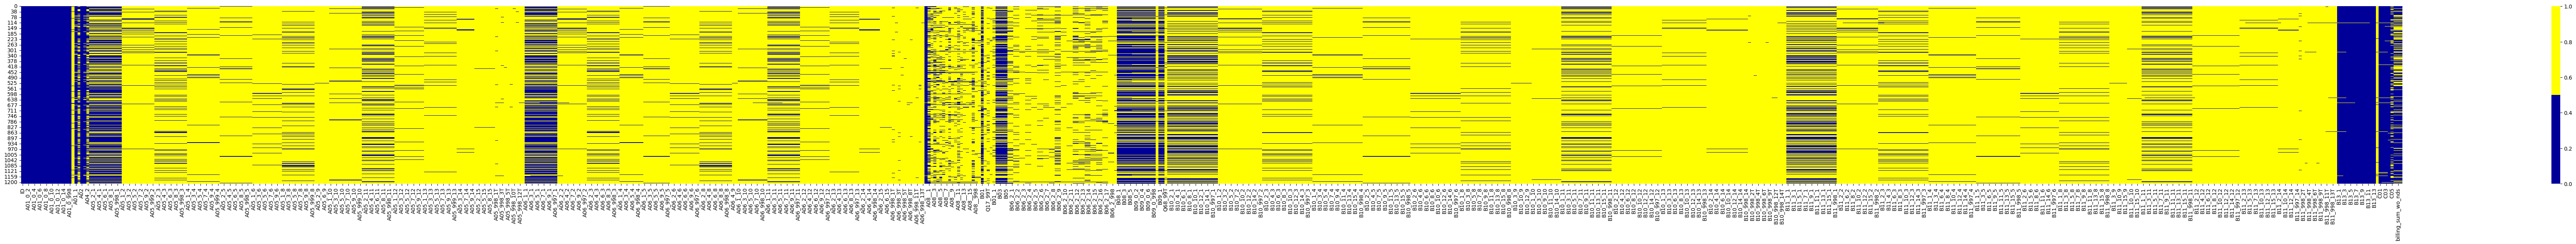

In [82]:
# Построим тепловую карту пропусков
cols = df.columns
colours = ['#000099', '#ffff00'] # желтый - пропущенные данные, синий - не пропущенные
plt.figure(figsize=(100,6))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

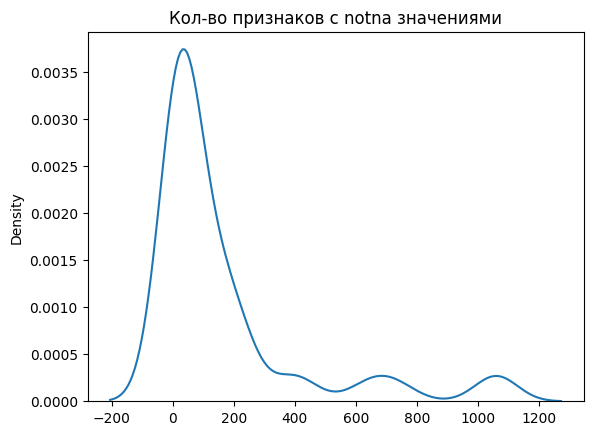

In [83]:
sns.kdeplot(df.notna().sum().sort_values())
plt.title('Кол-во признаков с notna значениями')
plt.show()

Судя по тому, что какую-то вменяемую заполняемость имеют небольшое число признаков, можно предположить, что они станут определяющими для сегментации.

Посмотрим, какие поля с открытыми вопросами оказались заполненными.

Все текстовые поля можно удалить при сегментации, либо попробовать через семантику сделать новые фичи

In [84]:
for c in ['A01_1', 'A01_2', 'A01_2', 'A02', 'A04_1', 'B01', 'B01_1', 'B01_1', 'B02', 'B03', 'B04', 'B05', 'B09_1', 'B12', 'C01']:
  df[c] = df[c].astype('float')

In [85]:
n=0
obj_col_lict = []
for col in df.columns:
    if df[col].dtype == 'object':
        n+=1
        obj_col_lict.append(col)
        print(n, col, list(df[col].dropna().unique()))

1 A01_0_998T ['ярмарка мастеров', 'Али', 'Яндекс услуги', 'Farpost', 'Радио и газета', 'Реклама в телеграмм', 'Инстаграм', 'Циан', 'Газеты и журналы.. Телевидение.', 'Google карты и бизнес', 'радио', 'ZOON', 'доски объявлений', 'платное продвижение в Яндекс услугах', 'Продвижение в профсообществах через Телеграм', 'Adwords до отключения', 'e-mail рассылки', 'Яндекс Услуги', 'юла', 'телеграм', 'B2B', 'Профи', 'яндекс услуги', 'shops-prices.ru/', 'Оффлайн', 'Реклама в месенджерах', 'flamp', 'телеграмм канал']
2 A05_998_1T ['поиск персонала', 'продвижение партнерских и реферальных ссылок', 'К сожалению Яндекс.Директ не решает ни одну из задач', 'привлечение новых клиентов', 'Ничего не принесла', 'Зря потраченные деньги на рекламу Яндекс! Не работает!', 'Дорого и ОЧЕНЬ не эффективно', 'Дополнительный поток клиентов', 'Ни одну из задач не решил', 'Развитие', 'все было нормально', 'Эффективность от рекламы очень низкая а рекламный бюджет не маленький', 'ЯД - ничего не решил. Хотя нет - решил

In [86]:
"""
Неплохо бы проверить, может во 2 датасете есть эти данные
"""

print("Кол-во строк с отсутствующим результирующим признаком: ", df.billing_sum_wo_nds.isna().sum())

Кол-во строк с отсутствующим результирующим признаком:  306


In [87]:
df.shape

(1065, 804)

In [88]:
df.isna().sum().sort_values(ascending=False).head(20)

A05_998_12T    1064
A06_998_13T    1064
B10_998_15T    1064
B10_998_14T    1064
B10_998_2T     1064
B10_998_12T    1064
B10_998_4T     1064
A05_998_15T    1064
B10_998_9T     1064
A05_8_9        1063
B10_12_9       1063
B10_13_9       1063
B11_2_9        1063
A06_4_9        1063
B10_10_9       1063
A05_998_10T    1063
B10_11_9       1063
B10_3_9        1063
B10_8_9        1063
A05_998_4T     1063
dtype: int64

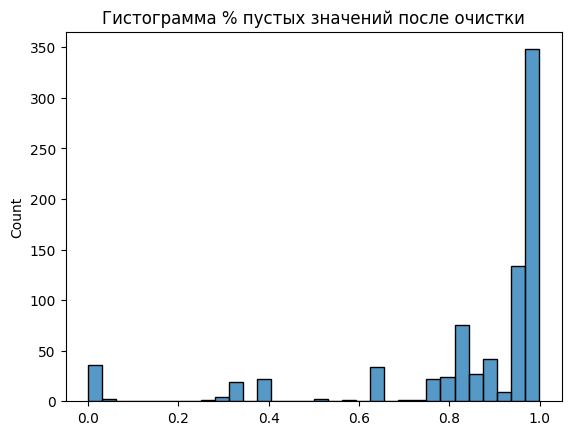

In [98]:
sns.histplot(df.isna().mean())
plt.title('Гистограмма % пустых значений после очистки');

Матрица сильно разрежена, вероятно для улучшения результата понадобится агрегация фичей

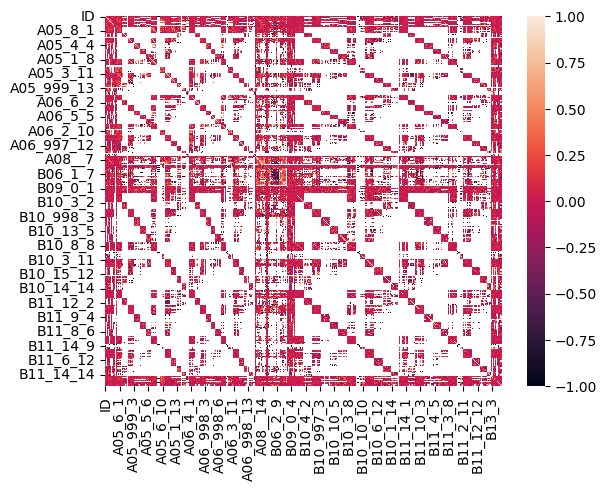

In [89]:
sns.heatmap(df.corr(numeric_only=True));

In [90]:
df.to_pickle('/content/drive/MyDrive/Colab Notebooks/data/df.pkl')

In [91]:
import sklearn
print(sklearn.__version__)

1.2.2


In [92]:
X = df.copy()
for col in X.columns:
  if df[col].dtype == 'object':
    X = X.drop(columns=col)
X = X.fillna(0)

In [93]:
X = X.drop(columns='ID')

In [94]:
X.shape

(1065, 747)

In [109]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init="auto")
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(3, 748)

In [110]:
X['cluster'] = clusters

In [111]:
X.corr().cluster.dropna().sort_values(ascending=False).head(10)

cluster               1.000000
billing_sum_wo_nds    0.841794
billing_count         0.295436
days_of_life          0.203069
A06_8_8               0.192335
B11_15_10             0.168858
B10_9_10              0.168858
B10_10_10             0.168858
A05_999_13            0.168858
A04_1                 0.163544
Name: cluster, dtype: float64